In [33]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


from math import sqrt
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from tabulate import tabulate



In [34]:
# Load and Preprocess Data
df = pd.read_csv(r'D:\THESIS WORK(indoorcoverage)\ThesisProject\data\MscLab_data\realtime_RSS_data.csv')  # Replace with your actual file name
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace

In [35]:
df

,AP1,AP2,AP3,AP4,AP5,AP6,X,Y,Z
0,-76,-60,-83,-74,-63,-70,0.6096,0.0000,4.572
1,-55,-68,-84,-75,-60,-69,1.2192,0.0000,4.572
2,-49,-72,82,-68,-60,-58,1.8288,0.0000,4.572
3,-50,-71,-83,-68,-55,-58,2.4384,0.0000,4.572
4,-62,-61,-73,-65,-55,-59,3.0480,0.0000,4.572
...,...,...,...,...,...,...,...,...,...
359,-66,-60,-66,-53,-69,-61,1.8288,11.5824,4.572
360,-66,-60,-66,-53,-69,-61,2.4384,11.5824,4.572
361,-64,-61,-66,-52,-70,-61,3.0480,11.5824,4.572
362,-63,-62,-66,-53,-72,-62,3.6576,11.5824,4.572


In [36]:
# Handle missing values
df.dropna(inplace=True)

In [37]:
df

,AP1,AP2,AP3,AP4,AP5,AP6,X,Y,Z
0,-76,-60,-83,-74,-63,-70,0.6096,0.0000,4.572
1,-55,-68,-84,-75,-60,-69,1.2192,0.0000,4.572
2,-49,-72,82,-68,-60,-58,1.8288,0.0000,4.572
3,-50,-71,-83,-68,-55,-58,2.4384,0.0000,4.572
4,-62,-61,-73,-65,-55,-59,3.0480,0.0000,4.572
...,...,...,...,...,...,...,...,...,...
359,-66,-60,-66,-53,-69,-61,1.8288,11.5824,4.572
360,-66,-60,-66,-53,-69,-61,2.4384,11.5824,4.572
361,-64,-61,-66,-52,-70,-61,3.0480,11.5824,4.572
362,-63,-62,-66,-53,-72,-62,3.6576,11.5824,4.572


In [38]:
# Split features and labels
X = df[['AP1', 'AP2', 'AP3', 'AP4','AP5','AP6']].values
y = df[['X', 'Y','Z']].values

In [39]:
X

array([[-76, -60, -83, -74, -63, -70],
       [-55, -68, -84, -75, -60, -69],
       [-49, -72,  82, -68, -60, -58],
       ...,
       [-64, -61, -66, -52, -70, -61],
       [-63, -62, -66, -53, -72, -62],
       [-69, -58, -66, -61, -68, -67]])

In [40]:
y

array([[ 0.6096,  0.    ,  4.572 ],
       [ 1.2192,  0.    ,  4.572 ],
       [ 1.8288,  0.    ,  4.572 ],
       ...,
       [ 3.048 , 11.5824,  4.572 ],
       [ 3.6576, 11.5824,  4.572 ],
       [ 4.2672, 11.5824,  4.572 ]])

In [41]:
df

,AP1,AP2,AP3,AP4,AP5,AP6,X,Y,Z
0,-76,-60,-83,-74,-63,-70,0.6096,0.0000,4.572
1,-55,-68,-84,-75,-60,-69,1.2192,0.0000,4.572
2,-49,-72,82,-68,-60,-58,1.8288,0.0000,4.572
3,-50,-71,-83,-68,-55,-58,2.4384,0.0000,4.572
4,-62,-61,-73,-65,-55,-59,3.0480,0.0000,4.572
...,...,...,...,...,...,...,...,...,...
359,-66,-60,-66,-53,-69,-61,1.8288,11.5824,4.572
360,-66,-60,-66,-53,-69,-61,2.4384,11.5824,4.572
361,-64,-61,-66,-52,-70,-61,3.0480,11.5824,4.572
362,-63,-62,-66,-53,-72,-62,3.6576,11.5824,4.572


In [42]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((291, 6), (73, 6), (291, 3), (73, 3))

In [44]:
X_train

array([[-58, -62, -72, -64, -63, -69],
       [-72, -75, -67, -58, -71, -77],
       [-64, -64, -59, -57, -63, -68],
       ...,
       [-64, -65, -62, -60, -66, -69],
       [-67, -70, -65, -55, -69, -73],
       [-64, -61, -68, -63, -71, -59]])

In [45]:
print("Original shape:", X_train.shape)


Original shape: (291, 6)


In [46]:
X_train.shape, X_test.shape

((291, 6), (73, 6))

In [47]:
X_train

array([[-58, -62, -72, -64, -63, -69],
       [-72, -75, -67, -58, -71, -77],
       [-64, -64, -59, -57, -63, -68],
       ...,
       [-64, -65, -62, -60, -66, -69],
       [-67, -70, -65, -55, -69, -73],
       [-64, -61, -68, -63, -71, -59]])

In [48]:

# Original shape: (291, 6)
X_train = X_train.reshape((X_train.shape[0], 3, 2))  # 3 timesteps, 2 features
X_test = X_test.reshape((X_test.shape[0], 3, 2))     # same reshape for test data

## LSTM MODEL

In [147]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(3, 2)))
model.add(LSTM(64))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='linear'))  # Predict x, y, z

#  Compile Model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

#  Evaluate Model
loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))


model.save("LSTM_model.keras")

# Compute Accuracy and Classification Metrics
threshold = 6.5
distances = np.linalg.norm(y_test - y_pred, axis=1)
accuracy = np.mean(distances <= threshold) * 100

# Binary classification for precision, recall, F1
y_true_binary = np.ones_like(distances)  # All are positive samples
y_pred_binary = (distances <= threshold).astype(int)

# Classification metrics
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)

#  Format Results
accuracy_str  = f"{accuracy:.2f}"
precision_str = f"{precision:.2f}"
recall_str    = f"{recall:.2f}"
f1_str        = f"{f1:.2f}"

# Add ± values (manually or via cross-validation)
accuracy_formatted  = f"{accuracy_str} ± 0.00"
precision_formatted = f"{precision_str} ± 0.00"
recall_formatted    = f"{recall_str} ± 0.00"
f1_formatted        = f"{f1_str} ± 0.00"

# Print Table of Results
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
data = [
    ["RNN",           "88.61 ± 5.47", "1.00 ± 0.00", "0.89 ± 0.05", "0.94 ± 0.03"],
    ["CNN",           "69.54 ± 7.38", "1.00 ± 0.00", "0.70 ± 0.07", "0.82 ± 0.05"],
    ["Improved RNN",  "93.25 ± 6.10", "1.00 ± 0.00", "0.93 ± 0.06", "0.96 ± 0.03"],
    ["Your Model",    accuracy_formatted, precision_formatted, recall_formatted, f1_formatted]
]

print(tabulate(data, headers=headers, tablefmt="grid"))

# 📋 Optional: print raw metrics too
print("\n📊 Raw Metrics:")
print(f"Test RMSE: {rmse:.4f}")


Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 35.6180 - val_loss: 33.9953
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25.9177 - val_loss: 30.6419
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16.0271 - val_loss: 25.9622
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.6767 - val_loss: 20.3448
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.4699 - val_loss: 17.6381
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.4412 - val_loss: 16.5041
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.2659 - val_loss: 16.2349
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.9437 - val_loss: 16.2922
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.1051 - val_loss: 14.4695
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.4450 - val_loss: 13.6186
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.2656 - val_loss: 12.3657
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/s

In [148]:
import numpy as np

# Calculate distances between true and predicted coordinates
distances = np.linalg.norm(y_test - y_pred, axis=1)

# Loop over threshold values from 0 to 20
print("\nThreshold\tAccuracy (%)")
print("-" * 30)
for threshold in range(0, 21):  # 0 to 20 inclusive
    accuracy = np.mean(distances <= threshold) * 100
    print(f"{threshold:>9} \t {accuracy:6.2f}")



Threshold	Accuracy (%)
------------------------------
        0 	   0.00
        1 	   0.00
        2 	   9.59
        3 	  28.77
        4 	  39.73
        5 	  50.68
        6 	  64.38
        7 	  76.71
        8 	  89.04
        9 	  94.52
       10 	  98.63
       11 	  98.63
       12 	  98.63
       13 	  98.63
       14 	 100.00
       15 	 100.00
       16 	 100.00
       17 	 100.00
       18 	 100.00
       19 	 100.00
       20 	 100.00


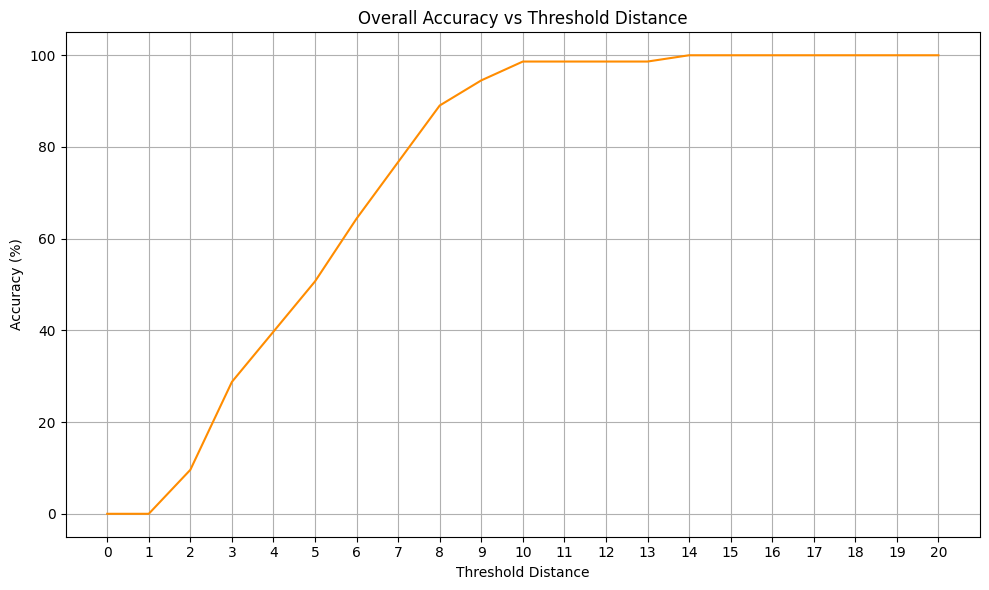

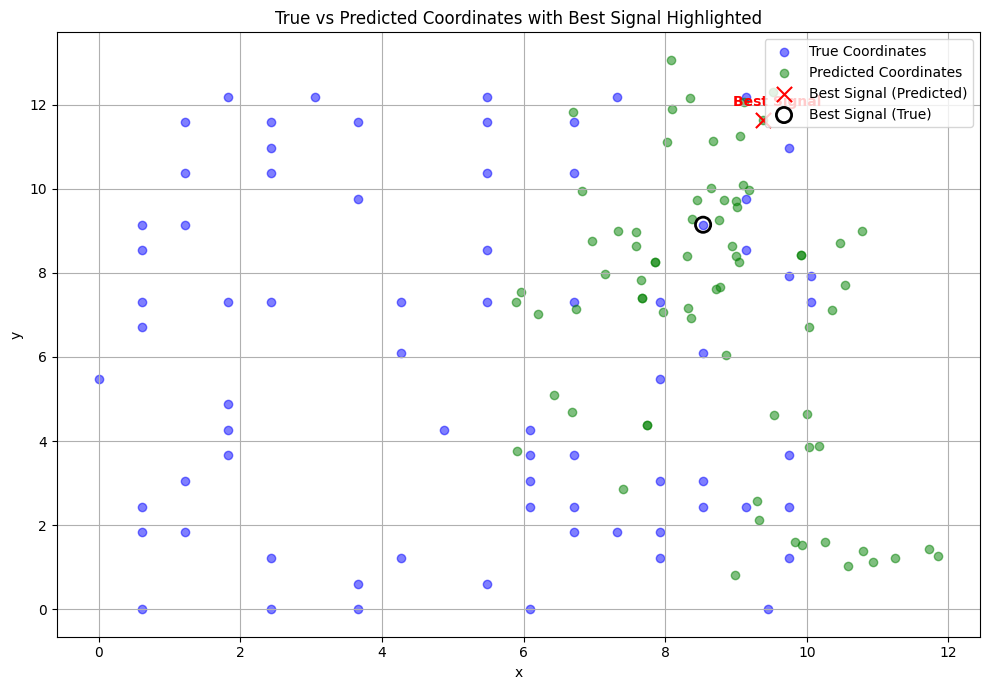

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate distances between true and predicted coordinates
distances = np.linalg.norm(y_test - y_pred, axis=1)

# Store threshold values and corresponding accuracies
thresholds = list(range(0, 21))
accuracies = []

for threshold in thresholds:
    accuracy = np.mean(distances <= threshold) * 100
    accuracies.append(accuracy)

# Plot accuracy vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, linestyle='-', color='darkorange')
plt.title('Overall Accuracy vs Threshold Distance')
plt.xlabel('Threshold Distance')
plt.ylabel('Accuracy (%)')
plt.xticks(thresholds)
plt.grid(True)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Reshape and find the index with the best signal (lowest total RSSI = strongest signal)
best_signal_index = np.argmin(np.sum(X_test.reshape(X_test.shape[0], -1), axis=1))
best_coords = y_pred[best_signal_index]
true_coords = y_test[best_signal_index]

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.5)
plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates', alpha=0.5)

# Best signal predicted coordinate (in red cross)
plt.scatter(best_coords[0], best_coords[1], c='red', label='Best Signal (Predicted)', s=120, marker='x')

# Corresponding true coordinate (optional, in black circle)
plt.scatter(true_coords[0], true_coords[1], facecolors='none', edgecolors='black', 
            label='Best Signal (True)', s=120, marker='o', linewidth=2)

# Optional: annotation
plt.annotate('Best Signal', 
             (best_coords[0], best_coords[1]), 
             textcoords="offset points", 
             xytext=(10, 10), 
             ha='center', fontsize=10, color='red', weight='bold')

plt.title('True vs Predicted Coordinates with Best Signal Highlighted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Simple RNN Model

In [152]:
from tensorflow.keras.layers import SimpleRNN, Dense
# 📌 Define RNN Architecture
model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(3,2)),
    Dense(64, activation='relu'),
    Dense(3, activation='linear')  # output x and y
])

# 📌 Compile Model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# 📌 Train the Model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# 📌 Evaluate Model
y_pred = model.predict(X_test)
loss = model.evaluate(X_test, y_test, verbose=0)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

model.save("simple_rnn.keras")


from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from tabulate import tabulate
import numpy as np

# 📌 Overall Accuracy Calculation
threshold = 6.00
distances = np.linalg.norm(y_test - y_pred, axis=1)
accuracy = np.mean(distances <= threshold) * 100

# ✅ Compute RMSE
rmse_value = mean_squared_error(y_test, y_pred)  # Root MSE

# Binary classification for precision, recall, F1
y_true_binary = np.ones_like(distances)  # All true samples are "positive"
y_pred_binary = (distances <= threshold).astype(int)

# Compute classification metrics
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)

# Round and format metrics
accuracy_str  = f"{accuracy:.2f}"
precision_str = f"{precision:.2f}"
recall_str    = f"{recall:.2f}"
f1_str        = f"{f1:.2f}"

# Optional: add ± values if you have them from cross-validation
accuracy_formatted  = f"{accuracy_str} ± 0.00"
precision_formatted = f"{precision_str} ± 0.00"
recall_formatted    = f"{recall_str} ± 0.00"
f1_formatted        = f"{f1_str} ± 0.00"

# ⬇️ Results Table
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
data = [
    ["RNN",           "88.61 ± 5.47", "1.00 ± 0.00", "0.89 ± 0.05", "0.94 ± 0.03"],
    ["CNN",           "69.54 ± 7.38", "1.00 ± 0.00", "0.70 ± 0.07", "0.82 ± 0.05"],
    ["Improved RNN",  "93.25 ± 6.10", "1.00 ± 0.00", "0.93 ± 0.06", "0.96 ± 0.03"],
    ["Your Model",    accuracy_formatted, precision_formatted, recall_formatted, f1_formatted]
]

# 📊 Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))

# 📋 Optional: print raw metrics too
print("\n📊 Raw Metrics:")
print(f"Test RMSE: {rmse_value:.4f}")


# Calculate distances between true and predicted coordinates
distances = np.linalg.norm(y_test - y_pred, axis=1)

# Loop over threshold values from 0 to 20
print("\nThreshold\tAccuracy (%)")
print("-" * 30)
for threshold in range(0, 11):  # 0 to 20 inclusive
    accuracy = np.mean(distances <= threshold) * 100
    print(f"{threshold:>9} \t {accuracy:6.2f}")


Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 231.1178 - val_loss: 47.8598
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 36.5233 - val_loss: 19.2655
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.7964 - val_loss: 11.3313
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.9006 - val_loss: 10.1336
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2916 - val_loss: 9.3895
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7331 - val_loss: 8.5714
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.0901 - val_loss: 8.3393
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3430 - val_loss: 7.9914
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3505 - val_loss: 7.7450
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2515 - val_loss: 7.5451
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1335 - val_loss: 7.4938
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.96

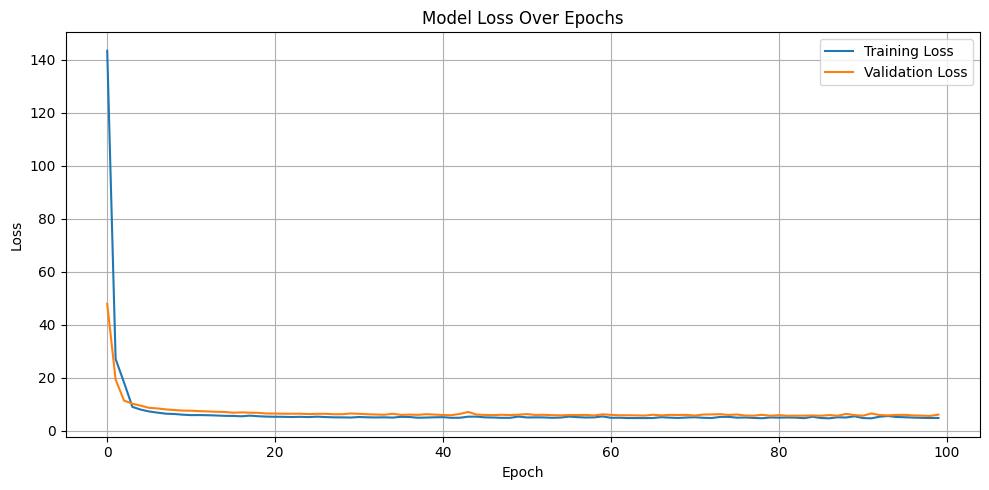

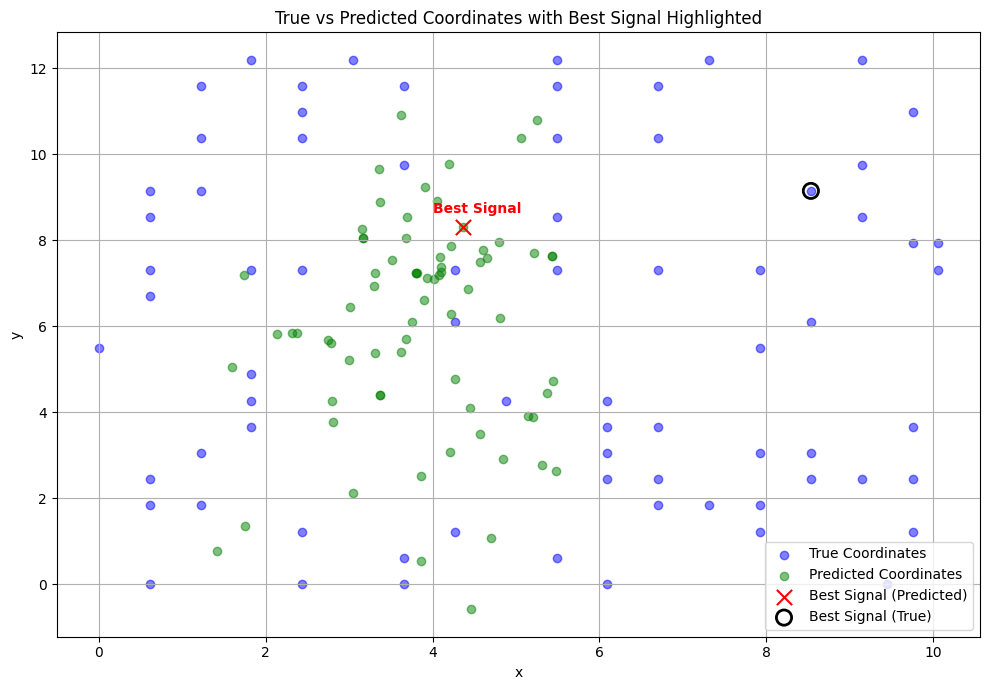

: 

In [ ]:
# 📌 Training & Validation Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📌 Predict and Visualize Coordinates
best_signal_index = np.argmin(np.sum(X_test.reshape(X_test.shape[0], -1), axis=1))
best_coords = y_pred[best_signal_index]
true_coords = y_test[best_signal_index]

plt.figure(figsize=(10, 7))
plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.5)
plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates', alpha=0.5)
plt.scatter(best_coords[0], best_coords[1], c='red', label='Best Signal (Predicted)', s=120, marker='x')
plt.scatter(true_coords[0], true_coords[1], facecolors='none', edgecolors='black',
            label='Best Signal (True)', s=120, marker='o', linewidth=2)
plt.annotate('Best Signal',
             (best_coords[0], best_coords[1]),
             textcoords="offset points",
             xytext=(10, 10),
             ha='center', fontsize=10, color='red', weight='bold')

plt.title('True vs Predicted Coordinates with Best Signal Highlighted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## hybrid model: Conv1D + Bidirectional LSTM + Dense, with Dropout, BatchNormalization, and EarlyStopping, trained with Adam optimizer, and validated using RMSE and thresholded accuracy

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error
import math


def rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


# Thresholded Accuracy for coordinate predictions
def thresholded_accuracy(y_true, y_pred, threshold=6.5):  # e.g., within 6.5 meters
    euclidean_dist = tf.sqrt(tf.reduce_sum(tf.square(y_true - y_pred), axis=-1))
    return tf.reduce_mean(tf.cast(euclidean_dist < threshold, tf.float32))



In [50]:
# Build model
def build_model(input_shape=(3,2)):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(LSTM(32))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='linear'))  # Output: x, y coordinates
    return model


# Compile the model
model = build_model()
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[rmse])



# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate model
y_predict = model.predict(X_test)

print(y_predict)

#model.save("hybrid_model.keras")


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 35.1827 - rmse: 5.9421 - val_loss: 33.1243 - val_rmse: 5.6459
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 33.9762 - rmse: 5.8040 - val_loss: 31.5165 - val_rmse: 5.5041
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 30.6839 - rmse: 5.5233 - val_loss: 30.0014 - val_rmse: 5.3699
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26.2696 - rmse: 5.1227 - val_loss: 25.7808 - val_rmse: 4.9699
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.9575 - rmse: 4.3387 - val_loss: 17.6017 - val_rmse: 4.0834
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.2979 - rmse: 3.3446 - val_loss: 10.1592 - val_rmse: 3.0767
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.9265 - rmse: 2.6200 - val_loss: 7.5648 - val_rmse: 2.6469
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.1185 - rmse: 2.4681 - val_loss: 8.2644 - val_rmse: 2.7263
Epoch 9/100
10/10 ━━━━━━━━━━

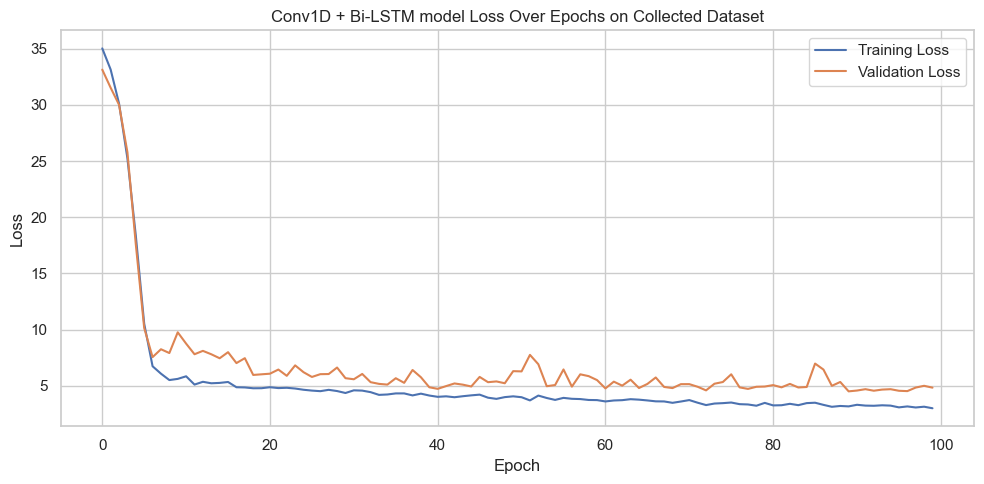

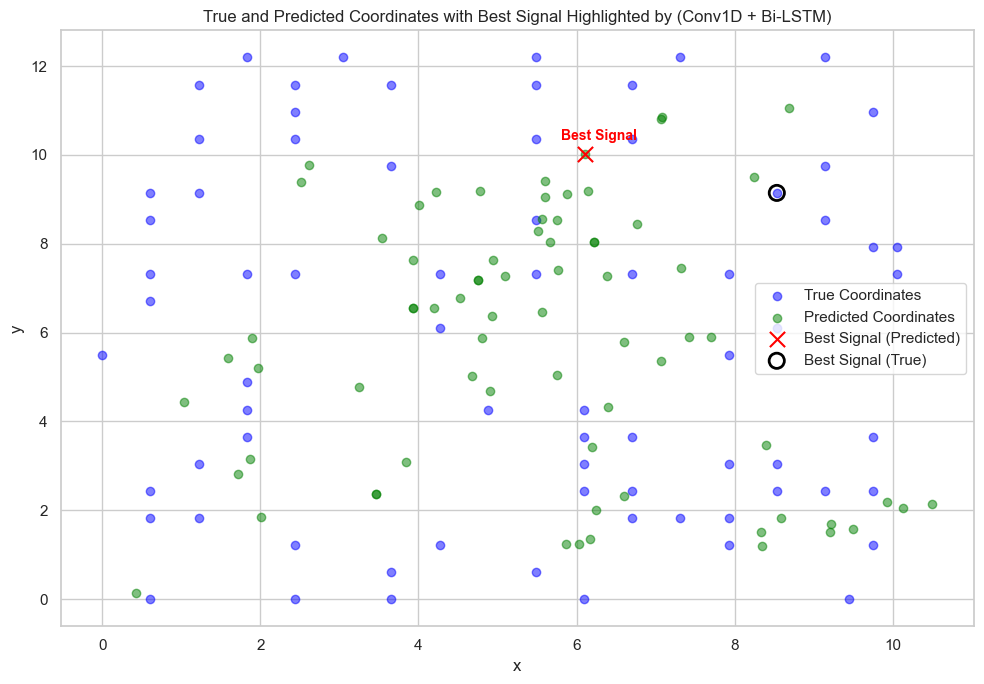

In [52]:
import matplotlib.pyplot as plt

# # Plot loss
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.title('Conv1D + Bi-LSTM model Loss Over Epochs on Collected Dataset')
# plt.xlabel('Epoch')
# plt.ylabel('MSE Loss')
# plt.legend()
# plt.grid(True)

# # Plot RMSE
# if 'rmse' in history.history:
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['rmse'], label='Train RMSE')
#     plt.plot(history.history['val_rmse'], label='Val RMSE')
#     plt.title('RMSE over Epochs')
#     plt.xlabel('Epoch')
#     plt.ylabel('RMSE')
#     plt.legend()
#     plt.grid(True)

# plt.tight_layout()
# plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Conv1D + Bi-LSTM model Loss Over Epochs on Collected Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


import numpy as np
import matplotlib.pyplot as plt

# Identify best signal index (lowest sum of RSSI values)
best_signal_index = np.argmin(np.sum(X_test.reshape(X_test.shape[0], -1), axis=1))
best_coords = y_predict[best_signal_index]
true_coords = y_test[best_signal_index]

plt.figure(figsize=(10, 7))
plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.5)
plt.scatter(y_predict[:, 0], y_predict[:, 1], c='green', label='Predicted Coordinates', alpha=0.5)
plt.scatter(best_coords[0], best_coords[1], c='red', label='Best Signal (Predicted)', s=120, marker='x')
plt.scatter(true_coords[0], true_coords[1], facecolors='none', edgecolors='black',
            label='Best Signal (True)', s=120, marker='o', linewidth=2)
plt.annotate('Best Signal',
             (best_coords[0], best_coords[1]),
             textcoords="offset points",
             xytext=(10, 10),
             ha='center', fontsize=10, color='red', weight='bold')

plt.title('True and Predicted Coordinates with Best Signal Highlighted by (Conv1D + Bi-LSTM)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [120]:
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from tabulate import tabulate
import numpy as np

# 📌 Overall Accuracy Calculation
threshold = 6.5
distances = np.linalg.norm(y_test - y_predict, axis=1)
accuracy = np.mean(distances <= threshold) * 100

# ✅ Compute RMSE
rmse_value = mean_squared_error(y_test, y_predict)  # Root MSE

# Binary classification for precision, recall, F1
y_true_binary = np.ones_like(distances)  # All true samples are "positive"
y_pred_binary = (distances <= threshold).astype(int)

# Compute classification metrics
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)

# Round and format metrics
accuracy_str  = f"{accuracy:.2f}"
precision_str = f"{precision:.2f}"
recall_str    = f"{recall:.2f}"
f1_str        = f"{f1:.2f}"

# Optional: add ± values if you have them from cross-validation
accuracy_formatted  = f"{accuracy_str} ± 0.00"
precision_formatted = f"{precision_str} ± 0.00"
recall_formatted    = f"{recall_str} ± 0.00"
f1_formatted        = f"{f1_str} ± 0.00"

# ⬇️ Results Table
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
data = [
    ["RNN",           "88.61 ± 5.47", "1.00 ± 0.00", "0.89 ± 0.05", "0.94 ± 0.03"],
    ["CNN",           "69.54 ± 7.38", "1.00 ± 0.00", "0.70 ± 0.07", "0.82 ± 0.05"],
    ["Improved RNN",  "93.25 ± 6.10", "1.00 ± 0.00", "0.93 ± 0.06", "0.96 ± 0.03"],
    ["Your Model",    accuracy_formatted, precision_formatted, recall_formatted, f1_formatted]
]

# 📊 Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))

# 📋 Optional: print raw metrics too
print("\n📊 Raw Metrics:")
print(f"Test RMSE: {rmse_value:.4f}")


+--------------+--------------+-------------+-------------+-------------+
| Model        | Accuracy     | Precision   | Recall      | F1 Score    |
+==============+==============+=============+=============+=============+
| RNN          | 88.61 ± 5.47 | 1.00 ± 0.00 | 0.89 ± 0.05 | 0.94 ± 0.03 |
+--------------+--------------+-------------+-------------+-------------+
| CNN          | 69.54 ± 7.38 | 1.00 ± 0.00 | 0.70 ± 0.07 | 0.82 ± 0.05 |
+--------------+--------------+-------------+-------------+-------------+
| Improved RNN | 93.25 ± 6.10 | 1.00 ± 0.00 | 0.93 ± 0.06 | 0.96 ± 0.03 |
+--------------+--------------+-------------+-------------+-------------+
| Your Model   | 95.89 ± 0.00 | 1.00 ± 0.00 | 0.96 ± 0.00 | 0.98 ± 0.00 |
+--------------+--------------+-------------+-------------+-------------+

📊 Raw Metrics:
Test RMSE: 4.8692


In [124]:
# Calculate distances between true and predicted coordinates
distances = np.linalg.norm(y_test - y_predict, axis=1)

# Loop over threshold values from 0 to 20
print("\nThreshold\tAccuracy (%)")
print("-" * 30)
for threshold in range(0, 13):  # 0 to 20 inclusive
    accuracy = np.mean(distances <= threshold) * 100
    print(f"{threshold:>9} \t {accuracy:6.2f}")



Threshold	Accuracy (%)
------------------------------
        0 	   0.00
        1 	  10.96
        2 	  30.14
        3 	  46.58
        4 	  61.64
        5 	  83.56
        6 	  90.41
        7 	  97.26
        8 	  98.63
        9 	 100.00
       10 	 100.00
       11 	 100.00
       12 	 100.00


In [125]:

# Compute RMSE
rmse_val = math.sqrt(mean_squared_error(y_test, y_predict))
print(f"Test RMSE: {rmse_val:.3f}")


Test RMSE: 2.207


## OTHER MODELS

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (LSTM, GRU, Dense, Dropout, BatchNormalization, Bidirectional,
                                     Conv1D, Input, Attention, LayerNormalization, MultiHeadAttention, Flatten)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tcn import TCN

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



# Custom Euclidean loss for coordinate regression
def euclidean_distance_loss(y_true, y_pred):
    return tf.reduce_mean(tf.sqrt(tf.reduce_sum(tf.square(y_true - y_pred), axis=-1)))

# Base training function
def compile_and_train(model, X_train, y_train, X_test, y_test, name, epochs=100, batch_size=16):
    model.compile(optimizer=Adam(0.001), loss=euclidean_distance_loss, metrics=['mse'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
                        batch_size=batch_size, verbose=1)
    model.save(f'{name}.h5')
    return history


# Bidirectional LSTM

In [54]:

bi_lstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False, activation='tanh'), input_shape=(3, 2)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(3)
])

compile_and_train(bi_lstm_model, X_train, y_train, X_test, y_test, 'new_bi_lstm')
# Train the model and save the history
history = compile_and_train(bi_lstm_model, X_train, y_train, X_test, y_test, 'new_bi_lstm')


Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 9.3080 - mse: 31.5293 - val_loss: 6.6318 - val_mse: 16.3282
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8154 - mse: 12.9202 - val_loss: 4.8488 - val_mse: 8.4775
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5769 - mse: 7.9451 - val_loss: 4.7712 - val_mse: 8.2297
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5048 - mse: 7.5490 - val_loss: 4.6990 - val_mse: 8.0064
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6166 - mse: 7.9327 - val_loss: 4.6339 - val_mse: 7.8274
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3978 - mse: 7.3873 - val_loss: 4.5736 - val_mse: 7.6666
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2931 - mse: 7.0179 - val_loss: 4.5181 - val_mse: 7.5068
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2308 - mse: 6.7941 - val_loss: 4.4735 - val_mse: 7.4025
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3959 - mse:

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.2578 - mse: 4.5256 - val_loss: 3.4032 - val_mse: 4.8372
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1872 - mse: 4.4457 - val_loss: 3.3585 - val_mse: 4.7249
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3746 - mse: 4.8558 - val_loss: 3.3221 - val_mse: 4.5455
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0916 - mse: 4.1925 - val_loss: 3.2513 - val_mse: 4.4489
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1633 - mse: 4.2996 - val_loss: 3.2900 - val_mse: 4.5187
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2809 - mse: 4.7074 - val_loss: 3.3201 - val_mse: 4.6013
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1809 - mse: 4.3776 - val_loss: 3.2280 - val_mse: 4.3610
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3860 - mse: 4.9325 - val_loss: 3.2660 - val_mse: 4.4414
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.11

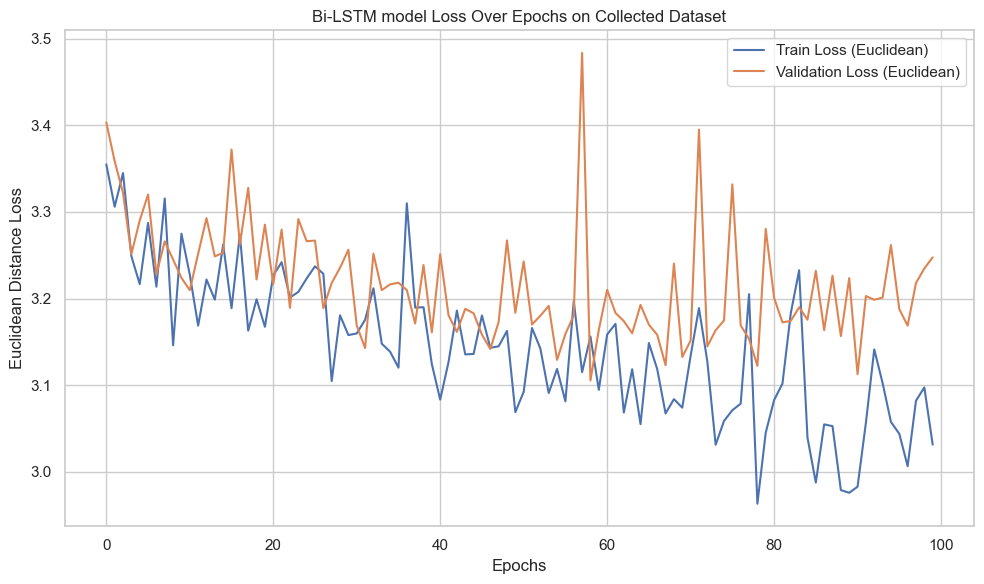

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


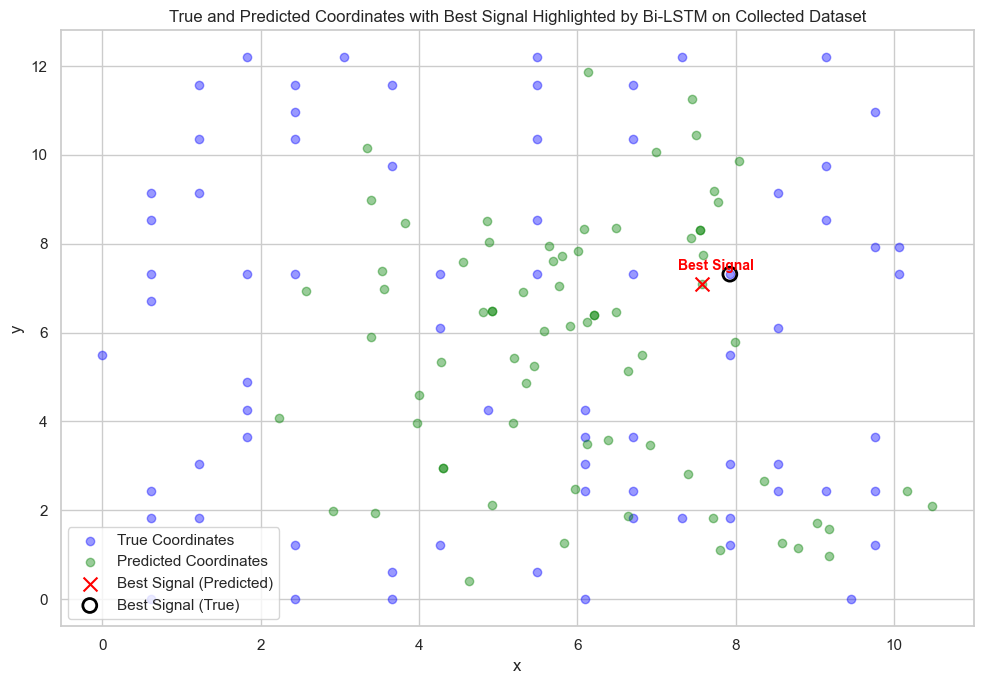

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('Bi-LSTM model Loss Over Epochs on Collected Dataset')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True and Predicted Coordinates with Best Signal Highlighted by Bi-LSTM on Collected Dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('new_bi_lstm.h5', X_test, y_test, euclidean_distance_loss)


# Stacked LSTM

In [ ]:

stacked_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(3,2)),
    Dropout(0.3),
    LSTM(32),
    Dense(3, activation='linear'),
    BatchNormalization()
])
compile_and_train(stacked_lstm, X_train, y_train, X_test, y_test, 'new_stacked_lstm')



compile_and_train(stacked_lstm, X_train, y_train, X_test, y_test, 'new_stacked_lstm')


# Train the model and save the history
history = compile_and_train(stacked_lstm, X_train, y_train, X_test, y_test,  'new_stacked_lstm')


Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 10.1333 - mse: 37.0580 - val_loss: 9.3902 - val_mse: 32.0543
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.9762 - mse: 36.4374 - val_loss: 9.4394 - val_mse: 32.3889
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.8081 - mse: 35.3858 - val_loss: 9.4217 - val_mse: 32.3272
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.6671 - mse: 34.2827 - val_loss: 9.6462 - val_mse: 33.8232
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.6659 - mse: 34.4688 - val_loss: 9.6554 - val_mse: 33.8991
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.6950 - mse: 34.2821 - val_loss: 9.6173 - val_mse: 33.7081
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.8292 - mse: 35.0394 - val_loss: 9.6104 - val_mse: 33.6095
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.7129 - mse: 34.8466 - val_loss: 9.7536 - val_mse: 34.5552
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 6.6244 - mse: 17.1201 - val_loss: 6.5742 - val_mse: 16.7827
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.8956 - mse: 18.3804 - val_loss: 6.5510 - val_mse: 16.6545
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9162 - mse: 18.6139 - val_loss: 6.2498 - val_mse: 15.4703
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8406 - mse: 18.2062 - val_loss: 6.0059 - val_mse: 14.1923
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5763 - mse: 16.9697 - val_loss: 5.8099 - val_mse: 13.3385
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9617 - mse: 18.8194 - val_loss: 6.0174 - val_mse: 14.3292
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4305 - mse: 16.3251 - val_loss: 6.1401 - val_mse: 14.9652
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.6257 - mse: 17.2994 - val_loss: 6.1754 - val_mse: 15.1842
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10m

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 4.3151 - mse: 8.1816 - val_loss: 4.2937 - val_mse: 7.8170
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3717 - mse: 8.4074 - val_loss: 4.3058 - val_mse: 7.9223
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1410 - mse: 7.5770 - val_loss: 4.2752 - val_mse: 7.6968
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1862 - mse: 7.9131 - val_loss: 4.4234 - val_mse: 8.2062
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2910 - mse: 8.1978 - val_loss: 4.3971 - val_mse: 8.2294
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2967 - mse: 8.0596 - val_loss: 4.6718 - val_mse: 9.2414
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4044 - mse: 8.3852 - val_loss: 4.2144 - val_mse: 7.5677
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0255 - mse: 7.0183 - val_loss: 4.0931 - val_mse: 6.9772
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.

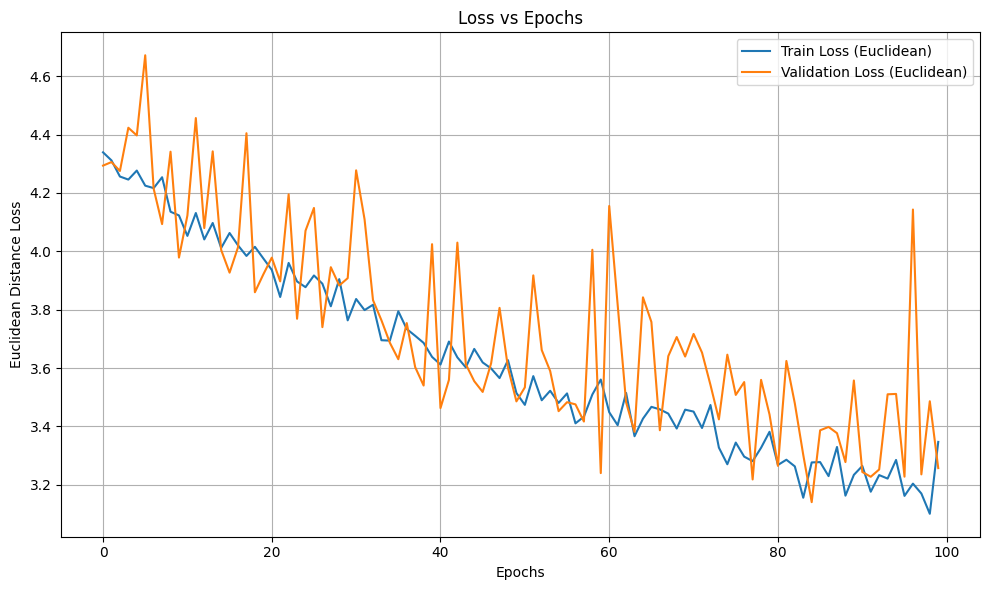

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step


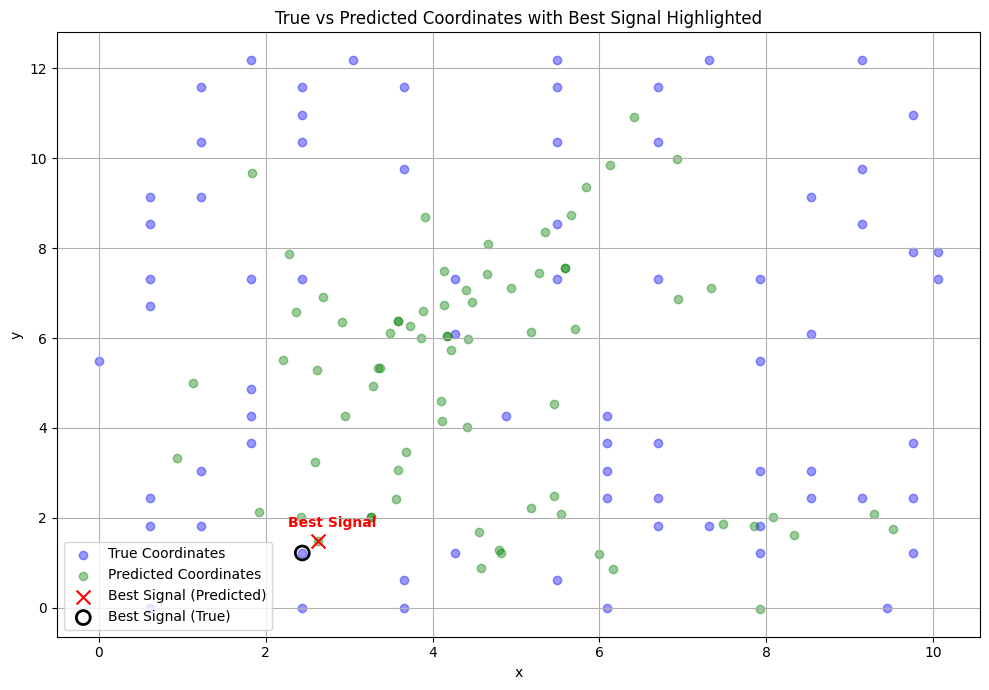

In [131]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True vs Predicted Coordinates with Best Signal Highlighted')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('new_stacked_lstm.h5', X_test, y_test, euclidean_distance_loss)


In [56]:

gru_model = Sequential([
    GRU(64, activation='tanh', input_shape=(3,2)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3)
])

compile_and_train(gru_model, X_train, y_train, X_test, y_test, 'new_gru')

# Train the model and save the history
history = compile_and_train(gru_model, X_train, y_train, X_test, y_test, 'new_gru')

Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 9.5334 - mse: 33.2428 - val_loss: 7.1465 - val_mse: 19.5554
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5814 - mse: 16.9486 - val_loss: 5.0716 - val_mse: 9.9048
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8305 - mse: 9.1369 - val_loss: 4.7529 - val_mse: 8.4165
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4980 - mse: 7.9004 - val_loss: 4.7053 - val_mse: 8.1665
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5493 - mse: 7.9227 - val_loss: 4.6878 - val_mse: 8.0920
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3480 - mse: 7.2708 - val_loss: 4.6280 - val_mse: 7.9073
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3156 - mse: 7.2757 - val_loss: 4.5681 - val_mse: 7.7697
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3344 - mse: 7.3239 - val_loss: 4.5356 - val_mse: 7.6310
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2504 - mse:

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.3924 - mse: 4.7604 - val_loss: 3.4556 - val_mse: 4.8528
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4926 - mse: 5.1647 - val_loss: 3.4007 - val_mse: 4.7531
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4067 - mse: 4.9669 - val_loss: 3.4978 - val_mse: 4.9622
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6401 - mse: 5.4334 - val_loss: 3.4359 - val_mse: 4.8204
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4413 - mse: 4.8817 - val_loss: 3.4245 - val_mse: 4.8098
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4385 - mse: 4.9420 - val_loss: 3.3745 - val_mse: 4.6942
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3544 - mse: 4.8090 - val_loss: 3.4120 - val_mse: 4.7904
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3819 - mse: 4.8241 - val_loss: 3.3432 - val_mse: 4.7142
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.46

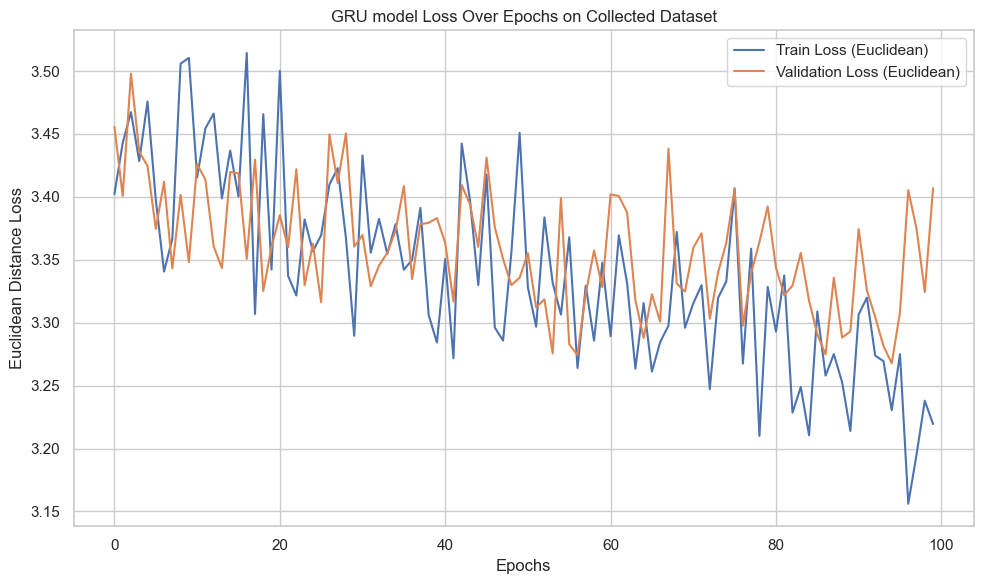

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


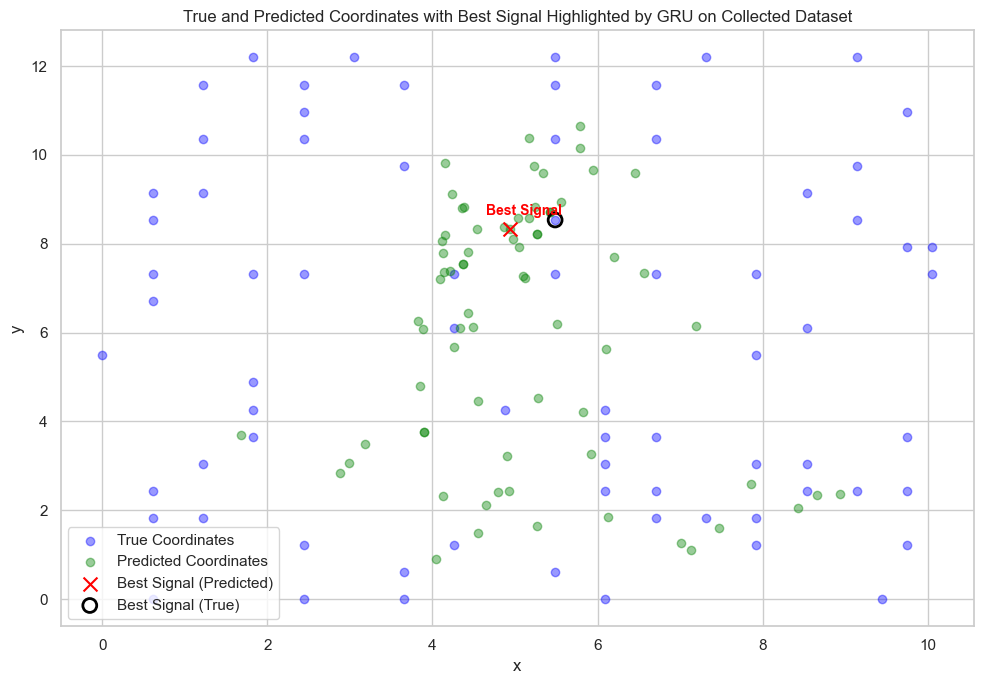

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('GRU model Loss Over Epochs on Collected Dataset')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True and Predicted Coordinates with Best Signal Highlighted by GRU on Collected Dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('new_gru.h5', X_test, y_test, euclidean_distance_loss)


In [58]:

from tensorflow.keras.layers import Lambda
from keras.layers import GlobalAveragePooling1D
input_layer = Input(shape=(3, 2))  # Adjusted input shape to match the reshaped data
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention = Attention()([lstm_out, lstm_out])
attention_out = GlobalAveragePooling1D()(attention)
dense_out = Dense(32, activation='relu')(attention_out)
output = Dense(3)(dense_out)

attention_model = Model(inputs=input_layer, outputs=output)

compile_and_train(attention_model, X_train, y_train, X_test, y_test, 'new_lstm_attention')

# Train the model and save the history
history = compile_and_train(attention_model, X_train, y_train, X_test, y_test, 'new_lstm_attention')


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 10.2632 - mse: 37.9917 - val_loss: 9.0734 - val_mse: 30.1657
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5553 - mse: 27.0467 - val_loss: 6.8504 - val_mse: 18.1841
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1008 - mse: 14.7877 - val_loss: 5.0532 - val_mse: 10.0362
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8510 - mse: 8.9987 - val_loss: 4.8236 - val_mse: 8.7660
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4585 - mse: 7.6397 - val_loss: 4.7771 - val_mse: 8.3681
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4849 - mse: 7.5556 - val_loss: 4.7669 - val_mse: 8.3373
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3404 - mse: 7.1656 - val_loss: 4.7427 - val_mse: 8.2541
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2536 - mse: 6.9896 - val_loss: 4.7276 - val_mse: 8.2108
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - los

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.2614 - mse: 4.6154 - val_loss: 3.3470 - val_mse: 4.6857
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0406 - mse: 4.0968 - val_loss: 3.4454 - val_mse: 4.9067
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2033 - mse: 4.6017 - val_loss: 3.4721 - val_mse: 5.1197
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1983 - mse: 4.5425 - val_loss: 3.3493 - val_mse: 4.7058
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1202 - mse: 4.3965 - val_loss: 3.3089 - val_mse: 4.6640
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0198 - mse: 4.0900 - val_loss: 3.3860 - val_mse: 4.8243
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0224 - mse: 4.1585 - val_loss: 3.4537 - val_mse: 5.1345
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1752 - mse: 4.5247 - val_loss: 3.3827 - val_mse: 4.8297
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.22

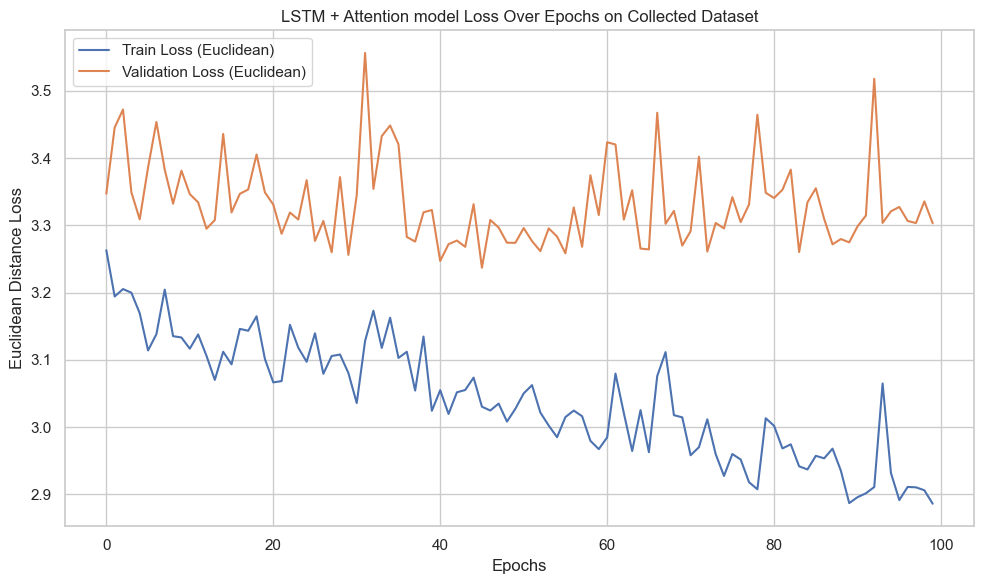

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


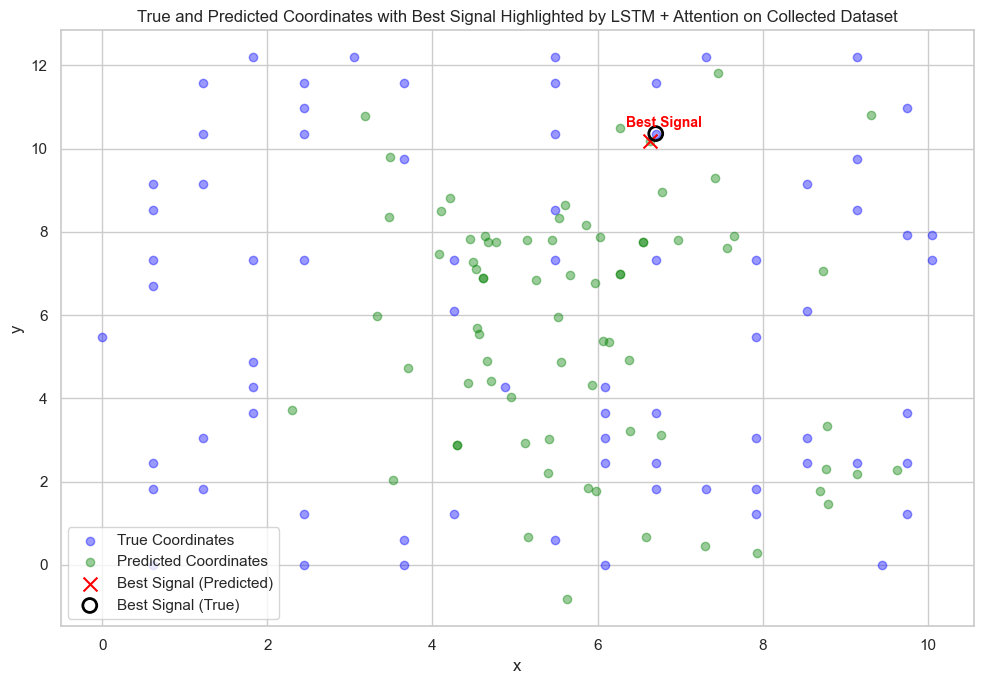

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('LSTM + Attention model Loss Over Epochs on Collected Dataset')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True and Predicted Coordinates with Best Signal Highlighted by LSTM + Attention on Collected Dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('new_lstm_attention.h5', X_test, y_test, euclidean_distance_loss)


In [ ]:

conv_lstm = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(3, 2)),
    BatchNormalization(),
    LSTM(64),
    Dense(3)
])


compile_and_train(conv_lstm, X_train, y_train, X_test, y_test, 'new_conv1d_lstm')


# Train the model and save the history
history = compile_and_train(conv_lstm, X_train, y_train, X_test, y_test, 'new_conv1d_lstm')


Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 9.6378 - mse: 33.7340 - val_loss: 7.4589 - val_mse: 21.0144
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1566 - mse: 30.6946 - val_loss: 6.2527 - val_mse: 14.9407
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8524 - mse: 23.2322 - val_loss: 5.4634 - val_mse: 11.3357
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0015 - mse: 14.5903 - val_loss: 4.9380 - val_mse: 9.0730
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2621 - mse: 7.6365 - val_loss: 4.7711 - val_mse: 8.4430
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4695 - mse: 5.0737 - val_loss: 4.8169 - val_mse: 8.7496
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.3616 - mse: 4.8198 - val_loss: 4.8087 - val_mse: 8.7394
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3828 - mse: 4.7887 - val_loss: 4.9276 - val_mse: 9.3122
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2297 

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 1.7253 - mse: 1.8643 - val_loss: 2.9576 - val_mse: 4.0296
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5935 - mse: 1.6817 - val_loss: 2.8638 - val_mse: 3.8940
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6704 - mse: 1.6753 - val_loss: 2.6688 - val_mse: 3.5222
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6524 - mse: 1.7321 - val_loss: 2.6580 - val_mse: 3.5419
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4594 - mse: 1.4977 - val_loss: 2.5969 - val_mse: 3.3963
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6196 - mse: 1.6399 - val_loss: 2.7864 - val_mse: 3.8464
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4160 - mse: 1.3103 - val_loss: 2.6598 - val_mse: 3.5538
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5505 - mse: 1.6815 - val_loss: 2.6337 - val_mse: 3.4477
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.58

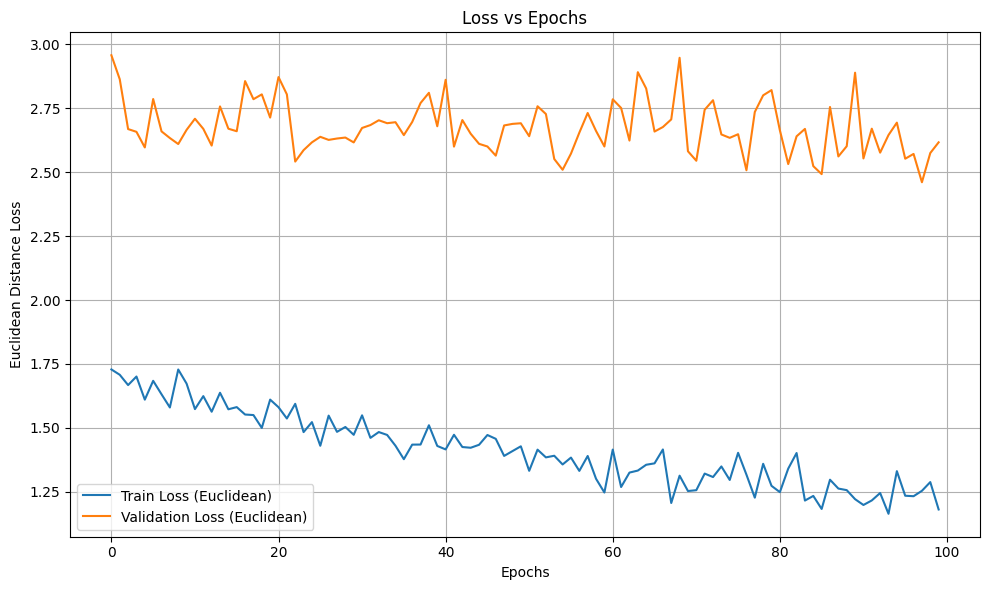

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


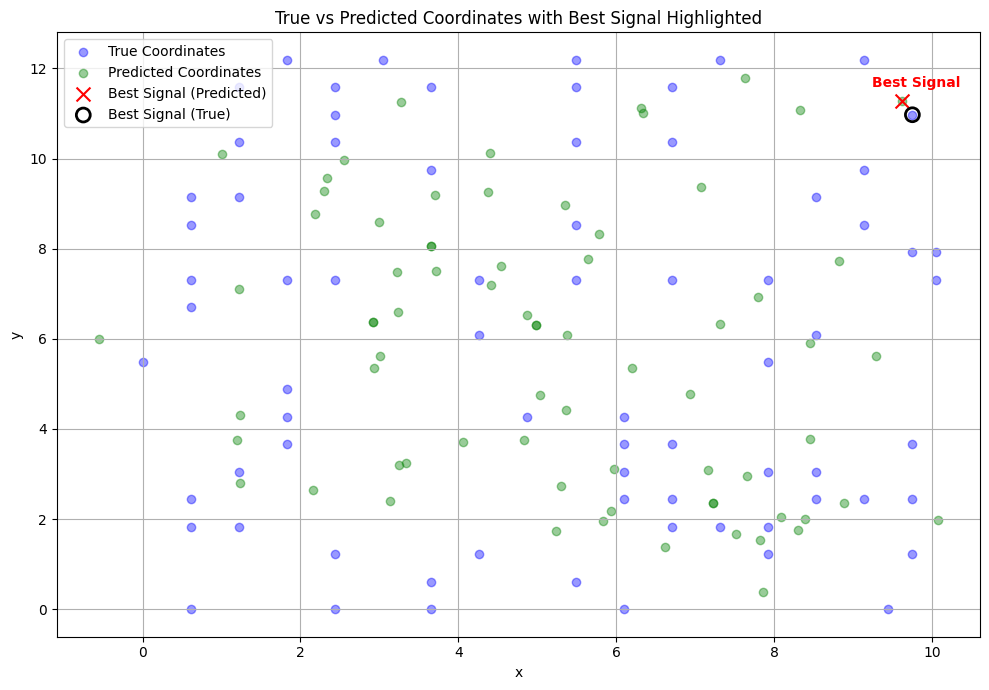

In [137]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True vs Predicted Coordinates with Best Signal Highlighted')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('new_conv1d_lstm.h5', X_test, y_test, euclidean_distance_loss)


In [ ]:

tcn_model = Sequential([
    TCN(64, input_shape=(3, 2), return_sequences=False, kernel_size=2, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(3, activation='linear', kernel_regularizer=l2(0.001))
])

compile_and_train(tcn_model, X_train, y_train, X_test, y_test, 'new_tcn')

# Train the model and save the history
history = compile_and_train(tcn_model, X_train, y_train, X_test, y_test, 'new_conv1d_lstm')



d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\tcn\tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 294.0703 - mse: 38312.0039 - val_loss: 44.2317 - val_mse: 660.4773
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.7393 - mse: 1754.4711 - val_loss: 16.4555 - val_mse: 97.1531
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 35.0316 - mse: 497.8563 - val_loss: 9.1794 - val_mse: 31.1501
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.4009 - mse: 252.9242 - val_loss: 7.5038 - val_mse: 22.2716
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.9349 - mse: 91.7507 - val_loss: 5.4847 - val_mse: 11.9049
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.2687 - mse: 50.7078 - val_loss: 6.5042 - val_mse: 15.0491
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.8126 - mse: 31.0763 - val_loss: 5.1727 - val_mse: 10.4885
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4078 - mse: 21.7158 - val_loss: 5.5760 - val_mse: 11.5950
Epoch 9/100
19/19 ━━━━━

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 4.2492 - mse: 6.9953 - val_loss: 4.7013 - val_mse: 8.6129
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.8016 - mse: 5.9242 - val_loss: 4.4111 - val_mse: 7.4007
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.8685 - mse: 5.7428 - val_loss: 4.0206 - val_mse: 6.3006
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0498 - mse: 6.6417 - val_loss: 4.7272 - val_mse: 8.8588
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.6986 - mse: 5.6572 - val_loss: 4.6327 - val_mse: 8.2069
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.7062 - mse: 5.3981 - val_loss: 4.3007 - val_mse: 7.1822
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.8328 - mse: 5.9617 - val_loss: 4.1524 - val_mse: 6.5556
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.7867 - mse: 5.7608 - val_loss: 4.8621 - val_mse: 9.0712
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

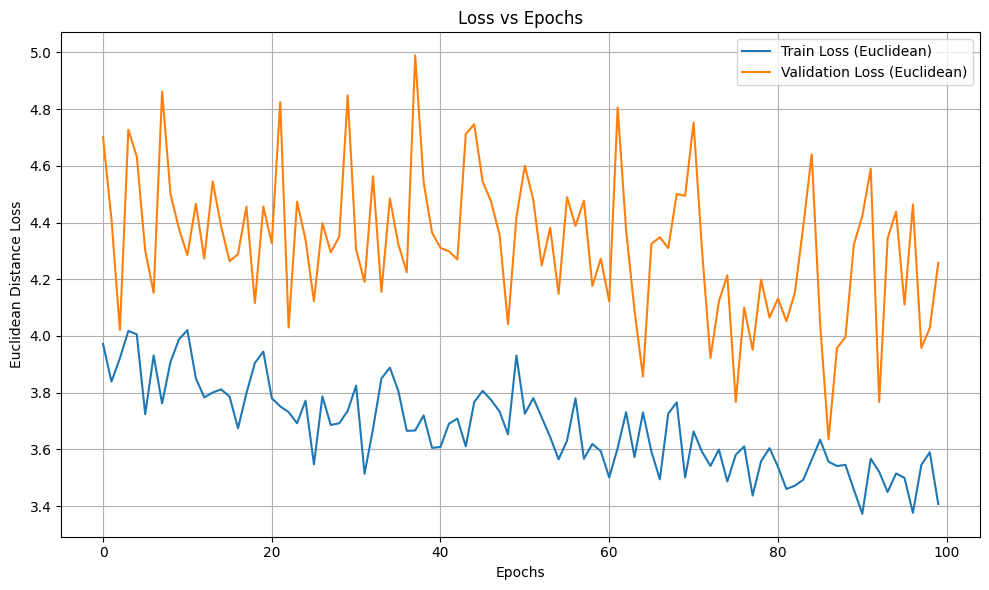

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step


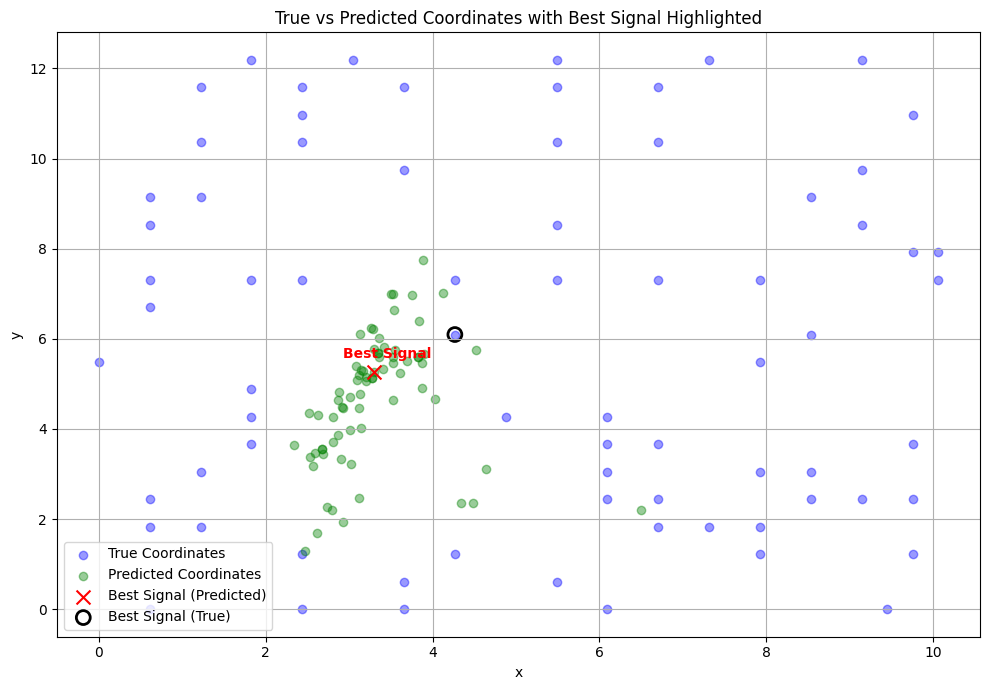

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True vs Predicted Coordinates with Best Signal Highlighted')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('new_tcn.h5', X_test, y_test, euclidean_distance_loss)


In [140]:
# 
input_layer = Input(shape=(3, 2))  # Adjusted input shape to match the reshaped data
x = tf.keras.layers.Reshape((3,2))(input_layer)
x = LayerNormalization(epsilon=1e-6)(x)
x = MultiHeadAttention(num_heads=2, key_dim=2)(x, x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dense(3)(x)
transformer_model = Model(inputs=input_layer, outputs=x)

compile_and_train(transformer_model, X_train, y_train, X_test, y_test, 'new_transformer')

# Train the model and save the history
history = compile_and_train(transformer_model, X_train, y_train, X_test, y_test, 'new_transformer')


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 10.2140 - mse: 37.6854 - val_loss: 9.9429 - val_mse: 35.6637
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9024 - mse: 35.4740 - val_loss: 9.8307 - val_mse: 34.8981
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6523 - mse: 33.5635 - val_loss: 9.6704 - val_mse: 33.8143
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.4998 - mse: 32.8149 - val_loss: 9.3785 - val_mse: 31.8936
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.4292 - mse: 32.1227 - val_loss: 8.8147 - val_mse: 28.3758
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3126 - mse: 25.6190 - val_loss: 7.7389 - val_mse: 22.2623
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1063 - mse: 19.2227 - val_loss: 6.2114 - val_mse: 14.6015
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8214 - mse: 13.2477 - val_loss: 5.4000 - val_mse: 10.8336
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.9926 - mse: 6.3064 - val_loss: 4.4955 - val_mse: 7.7813
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0711 - mse: 6.5513 - val_loss: 4.4836 - val_mse: 7.7681
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2228 - mse: 6.9713 - val_loss: 4.4891 - val_mse: 7.7848
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1318 - mse: 6.6866 - val_loss: 4.4686 - val_mse: 7.7593
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2196 - mse: 7.0580 - val_loss: 4.4749 - val_mse: 7.7519
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1738 - mse: 6.9731 - val_loss: 4.4809 - val_mse: 7.7612
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1052 - mse: 6.7419 - val_loss: 4.4908 - val_mse: 7.7676
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8918 - mse: 6.0502 - val_loss: 4.4979 - val_mse: 7.7892
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.16

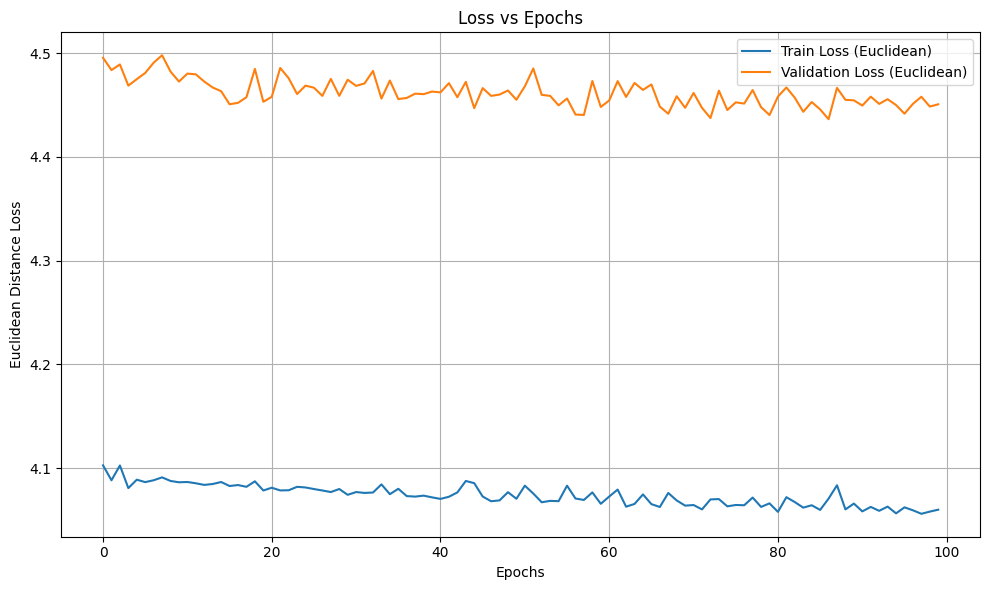

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


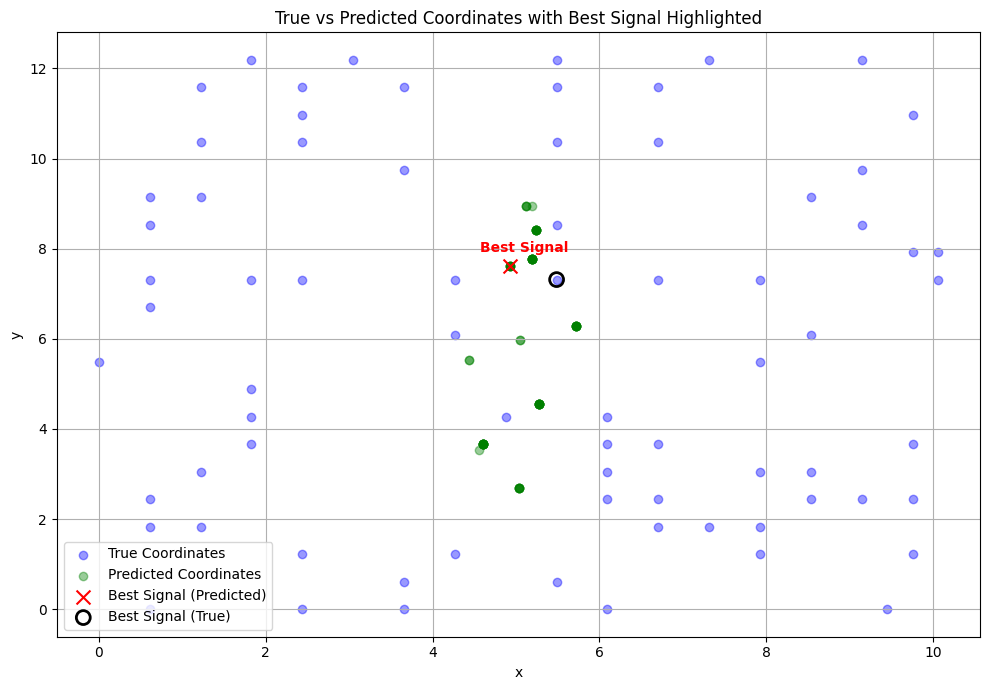

In [141]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True vs Predicted Coordinates with Best Signal Highlighted')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('new_transformer.h5', X_test, y_test, euclidean_distance_loss)


In [20]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# ----------------------- Config -----------------------
model_names = [
    'new_bi_lstm', 'new_stacked_lstm', 'new_gru',
    'new_lstm_attention', 'new_conv1d_lstm', 'new_tcn', 'new_transformer'
]
threshold = 6.5

# ----------------------- Helper Functions -----------------------
def euclidean_distance(y_true, y_pred):
    return np.mean(np.linalg.norm(y_true - y_pred, axis=1))

def classification_metrics(y_true, y_pred, threshold=6.5):
    distances = np.linalg.norm(y_true - y_pred, axis=1)
    acc = np.mean(distances <= threshold) * 100

    y_true_bin = np.ones_like(distances)
    y_pred_bin = (distances <= threshold).astype(int)

    prec = precision_score(y_true_bin, y_pred_bin)
    rec = recall_score(y_true_bin, y_pred_bin)
    f1 = f1_score(y_true_bin, y_pred_bin)
    return acc, prec, rec, f1

# ----------------------- Evaluation -----------------------
results = []
for model_name in model_names:
    try:
        print(f"🔄 Evaluating: {model_name}")
        model = tf.keras.models.load_model(f"{model_name}.h5", compile=False)
        y_pred = model.predict(X_test)

        # Regression Metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        ed = euclidean_distance(y_test, y_pred)

        # Classification-like Metrics
        acc, prec, rec, f1 = classification_metrics(y_test, y_pred, threshold)

        # Store formatted results
        results.append({
            "Model": model_name,
            "Accuracy": f"{acc:.2f} ± 0.00",
            "Precision": f"{prec:.2f} ± 0.00",
            "Recall": f"{rec:.2f} ± 0.00",
            "F1 Score": f"{f1:.2f} ± 0.00",
            "RMSE": rmse,
            "MAE": mae,
            "MSE": mse,
            "R2 Score": r2,
            "Euclidean Distance": ed
        })
    except Exception as e:
        print(f"❌ Failed to evaluate {model_name}: {e}")

# ----------------------- Add Previous Results -----------------------

# Manually add prior baseline models
baseline_models = [
    {"Model": "RNN",           "Accuracy": "88.61 ± 5.47", "Precision": "1.00 ± 0.00", "Recall": "0.89 ± 0.05", "F1 Score": "0.94 ± 0.03"},
    {"Model": "CNN",           "Accuracy": "69.54 ± 7.38", "Precision": "1.00 ± 0.00", "Recall": "0.70 ± 0.07", "F1 Score": "0.82 ± 0.05"},
    {"Model": "Improved RNN",  "Accuracy": "93.25 ± 6.10", "Precision": "1.00 ± 0.00", "Recall": "0.93 ± 0.06", "F1 Score": "0.96 ± 0.03"},
    {"Model": "Conv1D+Bi-LSTM+Dense",    "Accuracy": "95.89 ± 0.00", "Precision": "1.00 ± 0.00", "Recall": "0.96 ± 0.00", "F1 Score": "0.98 ± 0.00"}
]


results_class = baseline_models + [
    {
        "Model": r["Model"],
        "Accuracy": r["Accuracy"],
        "Precision": r["Precision"],
        "Recall": r["Recall"],
        "F1 Score": r["F1 Score"]
    }
    for r in results
]

# ----------------------- Display Tables -----------------------

# 📊 Classification-style Table
classification_table = [
    [r["Model"], r["Accuracy"], r["Precision"], r["Recall"], r["F1 Score"]]
    for r in results_class
]
headers_class = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
print("\n📌 Classification-style Evaluation Metrics")
print(tabulate(classification_table, headers=headers_class, tablefmt="grid"))

# 📊 Regression Table
regression_df = pd.DataFrame(results)
regression_df = regression_df[["Model", "RMSE", "MAE", "MSE", "R2 Score", "Euclidean Distance"]]
regression_df = regression_df.sort_values(by="RMSE")

print("\n📌 Regression Metrics (sorted by RMSE):")
print(regression_df.to_string(index=False))

🔄 Evaluating: new_bi_lstm
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
🔄 Evaluating: new_stacked_lstm
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
🔄 Evaluating: new_gru
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
🔄 Evaluating: new_lstm_attention
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
🔄 Evaluating: new_conv1d_lstm
❌ Failed to evaluate new_conv1d_lstm: Unknown layer: 'Custom>TCN'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
🔄 Evaluating: new_tcn
❌ Failed to evaluate new_tcn: Unknown layer: 'Custom>TCN'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
🔄 Evaluating: new_transformer
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

📌 Classification-style Evaluation Metrics
+-------------

In [21]:
# ----------------------- Combine All Metrics -----------------------

# Merge classification and regression results into one DataFrame
combined_results = []

# Include baselines first (no regression metrics)
for base in baseline_models:
    combined_results.append({
        "Model": base["Model"],
        "Accuracy": base["Accuracy"],
        "Precision": base["Precision"],
        "Recall": base["Recall"],
        "F1 Score": base["F1 Score"],
        "RMSE": np.nan,
        "MAE": np.nan,
        "MSE": np.nan,
        "R2 Score": np.nan,
        "Euclidean Distance": np.nan
    })

# Add deep learning models (with full metrics)
for r in results:
    combined_results.append({
        "Model": r["Model"],
        "Accuracy": r["Accuracy"],
        "Precision": r["Precision"],
        "Recall": r["Recall"],
        "F1 Score": r["F1 Score"],
        "RMSE": r["RMSE"],
        "MAE": r["MAE"],
        "MSE": r["MSE"],
        "R2 Score": r["R2 Score"],
        "Euclidean Distance": r["Euclidean Distance"]
    })

# Convert to DataFrame
all_metrics_df = pd.DataFrame(combined_results)


In [22]:
all_metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,RMSE,MAE,MSE,R2 Score,Euclidean Distance
0,RNN,88.61 ± 5.47,1.00 ± 0.00,0.89 ± 0.05,0.94 ± 0.03,NaN,NaN,NaN,NaN,NaN
1,CNN,69.54 ± 7.38,1.00 ± 0.00,0.70 ± 0.07,0.82 ± 0.05,NaN,NaN,NaN,NaN,NaN
2,Improved RNN,93.25 ± 6.10,1.00 ± 0.00,0.93 ± 0.06,0.96 ± 0.03,NaN,NaN,NaN,NaN,NaN
3,Conv1D+Bi-LSTM+Dense,95.89 ± 0.00,1.00 ± 0.00,0.96 ± 0.00,0.98 ± 0.00,NaN,NaN,NaN,NaN,NaN
4,new_bi_lstm,95.89 ± 0.00,1.00 ± 0.00,0.96 ± 0.00,0.98 ± 0.00,2.045691,1.308503,4.184850,-1.046706e+27,3.036981
5,new_stacked_lstm,90.41 ± 0.00,1.00 ± 0.00,0.90 ± 0.00,0.95 ± 0.00,2.204876,1.381420,4.861480,-7.637623e+24,3.257069
6,new_gru,98.63 ± 0.00,1.00 ± 0.00,0.99 ± 0.00,0.99 ± 0.00,2.071573,1.395407,4.291417,-2.321612e+27,3.168844
7,new_lstm_attention,98.63 ± 0.00,1.00 ± 0.00,0.99 ± 0.00,0.99 ± 0.00,2.132926,1.410046,4.549373,-1.017509e+27,3.240528
8,new_transformer,89.04 ± 0.00,1.00 ± 0.00,0.89 ± 0.00,0.94 ± 0.00,2.786866,1.960919,7.766622,-3.008901e+27,4.450630


C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\4166214248.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=all_metrics_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\4166214248.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


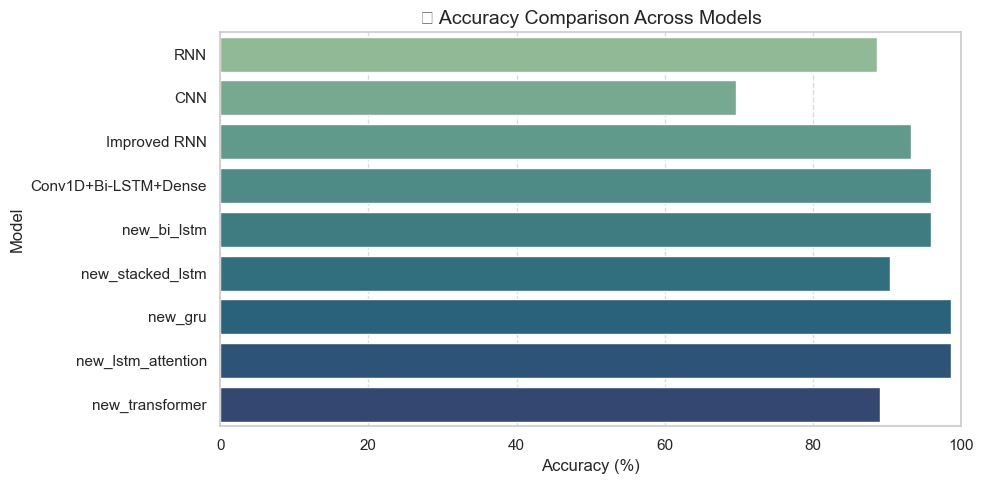

C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\4166214248.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=all_metrics_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\4166214248.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


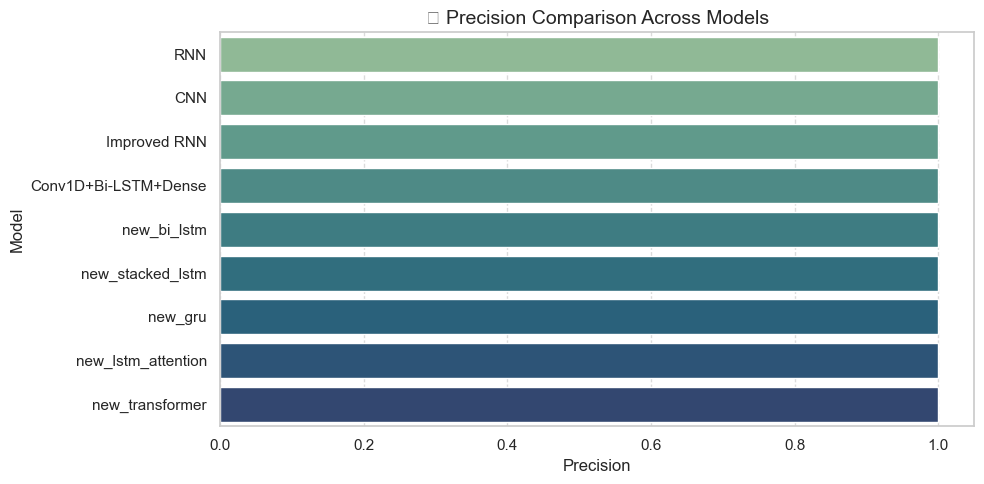

C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\4166214248.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=all_metrics_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\4166214248.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


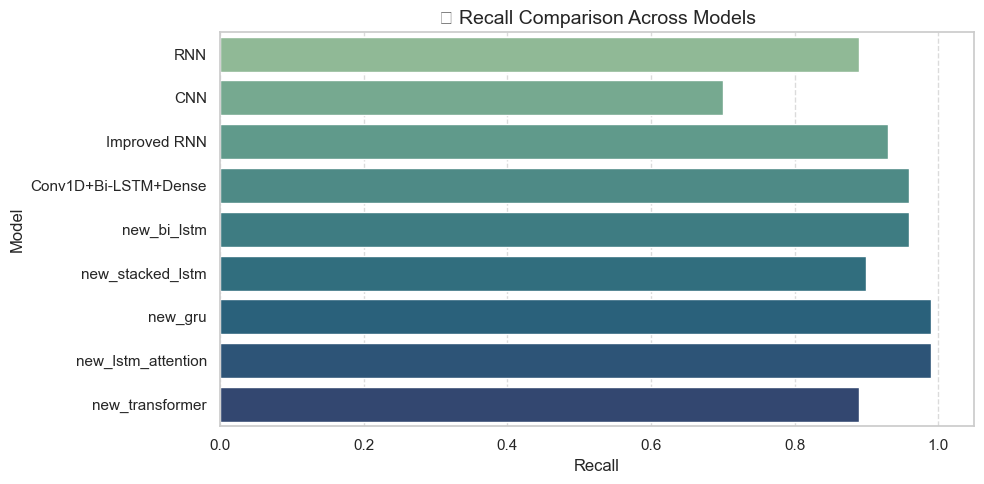

C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\4166214248.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=all_metrics_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\4166214248.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


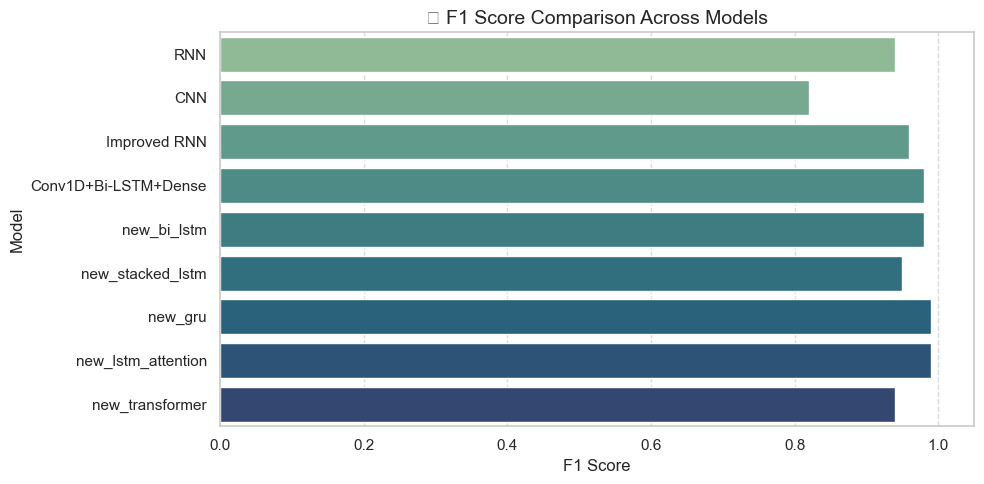

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure seaborn styling
sns.set(style="whitegrid")

# Clean and convert classification metrics
for col in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    all_metrics_df[col] = all_metrics_df[col].astype(str).str.extract(r'([\d.]+)').astype(float)

# Plot configuration
metric_settings = {
    "Accuracy": {"xlim": (0, 100), "xlabel": "Accuracy (%)"},
    "Precision": {"xlim": (0, 1.05), "xlabel": "Precision"},
    "Recall": {"xlim": (0, 1.05), "xlabel": "Recall"},
    "F1 Score": {"xlim": (0, 1.05), "xlabel": "F1 Score"}
}

# Generate individual plots
for metric, settings in metric_settings.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(data=all_metrics_df, y="Model", x=metric, palette="crest")
    plt.title(f"📊 {metric} Comparison Across Models", fontsize=14)
    plt.xlabel(settings["xlabel"])
    plt.ylabel("Model")
    plt.xlim(settings["xlim"])
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


## BEST PERFORMANCE MODEL

In [25]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# ----------------------- Config -----------------------
model_names = [
   'new_bi_lstm','new_gru','new_lstm_attention']
threshold = 6.5

# ----------------------- Helper Functions -----------------------
def euclidean_distance(y_true, y_pred):
    return np.mean(np.linalg.norm(y_true - y_pred, axis=1))

def classification_metrics(y_true, y_pred, threshold=6.5):
    distances = np.linalg.norm(y_true - y_pred, axis=1)
    acc = np.mean(distances <= threshold) * 100

    y_true_bin = np.ones_like(distances)
    y_pred_bin = (distances <= threshold).astype(int)

    prec = precision_score(y_true_bin, y_pred_bin)
    rec = recall_score(y_true_bin, y_pred_bin)
    f1 = f1_score(y_true_bin, y_pred_bin)
    return acc, prec, rec, f1

# ----------------------- Evaluation -----------------------
results = []
for model_name in model_names:
    try:
        print(f"🔄 Evaluating: {model_name}")
        model = tf.keras.models.load_model(f"{model_name}.h5", compile=False)
        y_pred = model.predict(X_test)

        # Regression Metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        ed = euclidean_distance(y_test, y_pred)

        # Classification-like Metrics
        acc, prec, rec, f1 = classification_metrics(y_test, y_pred, threshold)

        # Store formatted results
        results.append({
            "Model": model_name,
            "Accuracy": f"{acc:.2f} ± 0.00",
            "Precision": f"{prec:.2f} ± 0.00",
            "Recall": f"{rec:.2f} ± 0.00",
            "F1 Score": f"{f1:.2f} ± 0.00",
            "RMSE": rmse,
            "MAE": mae,
            "MSE": mse,
            "R2 Score": r2,
            "Euclidean Distance": ed
        })
    except Exception as e:
        print(f"❌ Failed to evaluate {model_name}: {e}")

# ----------------------- Add Previous Results -----------------------

# Manually add prior baseline models
baseline_models = [
    {"Model": "RNN",           "Accuracy": "88.61 ± 5.47", "Precision": "1.00 ± 0.00", "Recall": "0.89 ± 0.05", "F1 Score": "0.94 ± 0.03"},
    {"Model": "CNN",           "Accuracy": "69.54 ± 7.38", "Precision": "1.00 ± 0.00", "Recall": "0.70 ± 0.07", "F1 Score": "0.82 ± 0.05"},
    {"Model": "Improved RNN",  "Accuracy": "93.25 ± 6.10", "Precision": "1.00 ± 0.00", "Recall": "0.93 ± 0.06", "F1 Score": "0.96 ± 0.03"},
    {"Model": "Conv1D+Bi-LSTM+Dense",    "Accuracy": "95.89 ± 0.00", "Precision": "1.00 ± 0.00", "Recall": "0.96 ± 0.00", "F1 Score": "0.98 ± 0.00"}
]

results_class = baseline_models + [
    {
        "Model": r["Model"],
        "Accuracy": r["Accuracy"],
        "Precision": r["Precision"],
        "Recall": r["Recall"],
        "F1 Score": r["F1 Score"]
    }
    for r in results
]

# ----------------------- Display Tables -----------------------

# 📊 Classification-style Table
classification_table = [
    [r["Model"], r["Accuracy"], r["Precision"], r["Recall"], r["F1 Score"]]
    for r in results_class
]
headers_class = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
print("\n📌 Classification-style Evaluation Metrics")
print(tabulate(classification_table, headers=headers_class, tablefmt="grid"))

# 📊 Regression Table
regression_df = pd.DataFrame(results)
regression_df = regression_df[["Model", "RMSE", "MAE", "MSE", "R2 Score", "Euclidean Distance"]]
regression_df = regression_df.sort_values(by="RMSE")

print("\n📌 Regression Metrics (sorted by RMSE):")
print(regression_df.to_string(index=False))

🔄 Evaluating: new_bi_lstm
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
🔄 Evaluating: new_gru
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
🔄 Evaluating: new_lstm_attention
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

📌 Classification-style Evaluation Metrics
+----------------------+--------------+-------------+-------------+-------------+
| Model                | Accuracy     | Precision   | Recall      | F1 Score    |
+======================+==============+=============+=============+=============+
| RNN                  | 88.61 ± 5.47 | 1.00 ± 0.00 | 0.89 ± 0.05 | 0.94 ± 0.03 |
+----------------------+--------------+-------------+-------------+-------------+
| CNN                  | 69.54 ± 7.38 | 1.00 ± 0.00 | 0.70 ± 0.07 | 0.82 ± 0.05 |
+----------------------+--------------+-------------+-------------+-------------+
| Improved RNN         | 93.25 ± 6.10 | 1.00 ± 0.00 | 0.93 ± 0.06 | 0.96 ± 0.03 |
+----------------------+--------------+-------------+-------------+-------------+
| Conv1D+Bi-LSTM+Dense |

In [26]:
# ----------------------- Combine All Metrics -----------------------

# Merge classification and regression results into one DataFrame
combined_results = []

# Include baselines first (no regression metrics)
for base in baseline_models:
    combined_results.append({
        "Model": base["Model"],
        "Accuracy": base["Accuracy"],
        "Precision": base["Precision"],
        "Recall": base["Recall"],
        "F1 Score": base["F1 Score"],
        "RMSE": np.nan,
        "MAE": np.nan,
        "MSE": np.nan,
        "R2 Score": np.nan,
        "Euclidean Distance": np.nan
    })

# Add deep learning models (with full metrics)
for r in results:
    combined_results.append({
        "Model": r["Model"],
        "Accuracy": r["Accuracy"],
        "Precision": r["Precision"],
        "Recall": r["Recall"],
        "F1 Score": r["F1 Score"],
        "RMSE": r["RMSE"],
        "MAE": r["MAE"],
        "MSE": r["MSE"],
        "R2 Score": r["R2 Score"],
        "Euclidean Distance": r["Euclidean Distance"]
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(combined_results)


In [27]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,RMSE,MAE,MSE,R2 Score,Euclidean Distance
0,RNN,88.61 ± 5.47,1.00 ± 0.00,0.89 ± 0.05,0.94 ± 0.03,NaN,NaN,NaN,NaN,NaN
1,CNN,69.54 ± 7.38,1.00 ± 0.00,0.70 ± 0.07,0.82 ± 0.05,NaN,NaN,NaN,NaN,NaN
2,Improved RNN,93.25 ± 6.10,1.00 ± 0.00,0.93 ± 0.06,0.96 ± 0.03,NaN,NaN,NaN,NaN,NaN
3,Conv1D+Bi-LSTM+Dense,95.89 ± 0.00,1.00 ± 0.00,0.96 ± 0.00,0.98 ± 0.00,NaN,NaN,NaN,NaN,NaN
4,new_bi_lstm,95.89 ± 0.00,1.00 ± 0.00,0.96 ± 0.00,0.98 ± 0.00,2.045691,1.308503,4.184850,-1.046706e+27,3.036981
5,new_gru,98.63 ± 0.00,1.00 ± 0.00,0.99 ± 0.00,0.99 ± 0.00,2.071573,1.395407,4.291417,-2.321612e+27,3.168844
6,new_lstm_attention,98.63 ± 0.00,1.00 ± 0.00,0.99 ± 0.00,0.99 ± 0.00,2.132926,1.410046,4.549373,-1.017509e+27,3.240528


In [28]:
metrics_df["Model"] = metrics_df["Model"].replace({
    "new_bi_lstm": "Bi-LSTM",
    "new_lstm_attention": "LSTM + Attention",
    "new_gru": "GRU"})

In [30]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,RMSE,MAE,MSE,R2 Score,Euclidean Distance
0,RNN,88.61,1.0,0.89,0.94,NaN,NaN,NaN,NaN,NaN
1,CNN,69.54,1.0,0.70,0.82,NaN,NaN,NaN,NaN,NaN
2,Improved RNN,93.25,1.0,0.93,0.96,NaN,NaN,NaN,NaN,NaN
3,Conv1D+Bi-LSTM+Dense,95.89,1.0,0.96,0.98,NaN,NaN,NaN,NaN,NaN
4,Bi-LSTM,95.89,1.0,0.96,0.98,2.045691,1.308503,4.184850,-1.046706e+27,3.036981
5,GRU,98.63,1.0,0.99,0.99,2.071573,1.395407,4.291417,-2.321612e+27,3.168844
6,LSTM + Attention,98.63,1.0,0.99,0.99,2.132926,1.410046,4.549373,-1.017509e+27,3.240528


C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\960984278.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x="Model", y=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\960984278.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


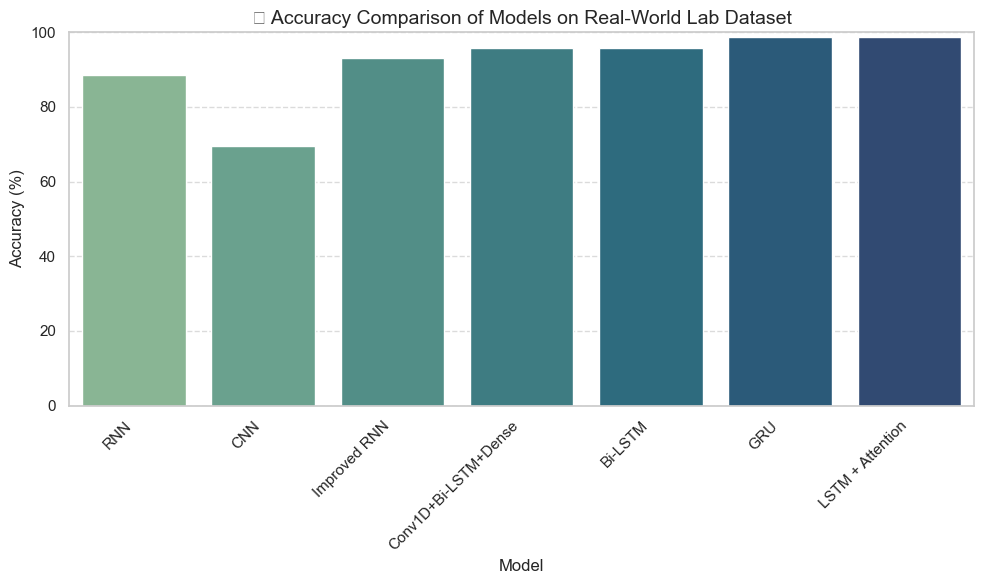

C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\960984278.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x="Model", y=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\960984278.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


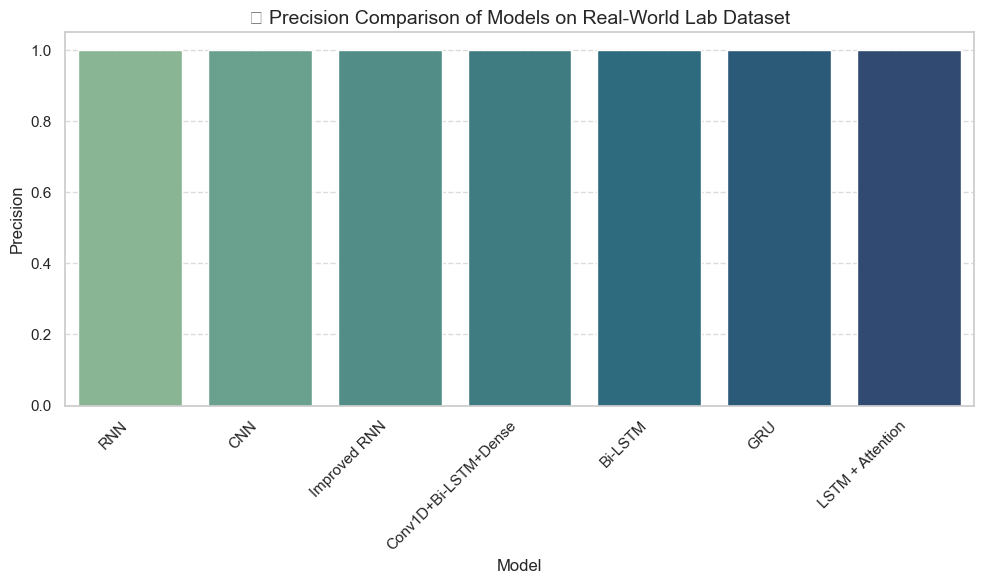

C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\960984278.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x="Model", y=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\960984278.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


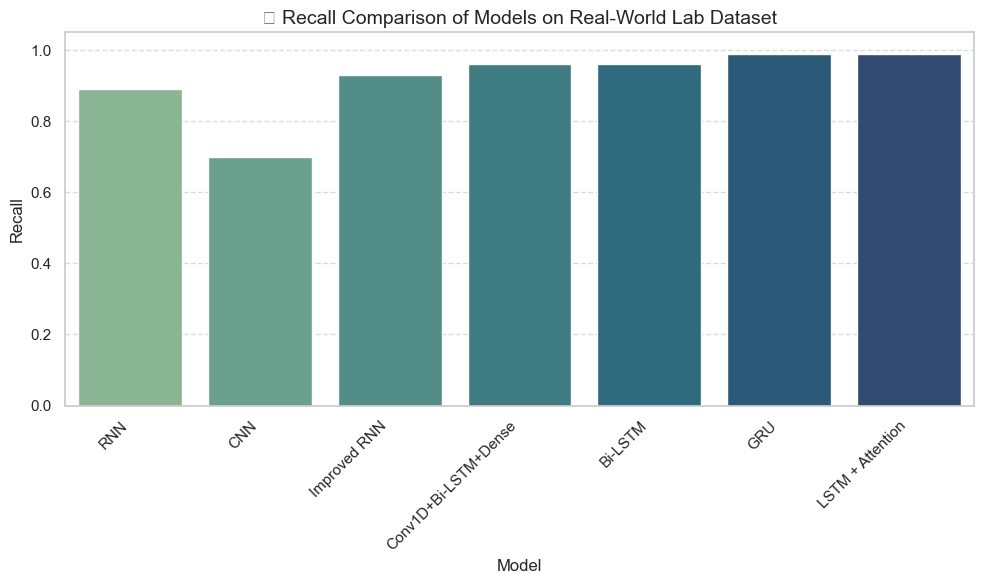

C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\960984278.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x="Model", y=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\960984278.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


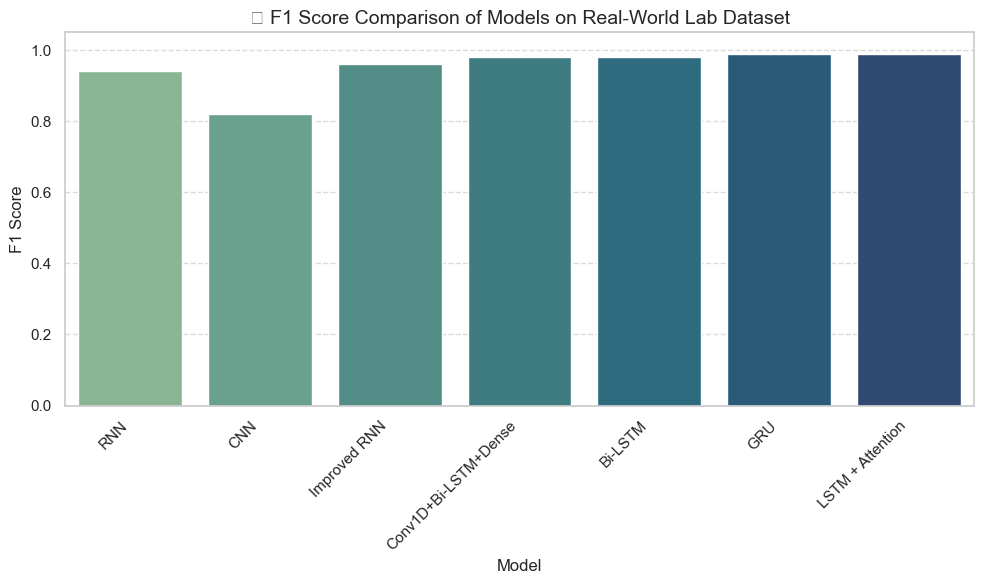

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure seaborn style
sns.set(style="whitegrid")

# Clean and convert classification metrics
for col in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    metrics_df[col] = metrics_df[col].astype(str).str.extract(r'([\d.]+)').astype(float)

# Plot settings per metric
metric_settings = {
    "Accuracy": {"ylim": (0, 100), "ylabel": "Accuracy (%)"},
    "Precision": {"ylim": (0, 1.05), "ylabel": "Precision"},
    "Recall": {"ylim": (0, 1.05), "ylabel": "Recall"},
    "F1 Score": {"ylim": (0, 1.05), "ylabel": "F1 Score"}
}

# List your 5 selected model names (must match the names in the DataFrame)
selected_models = ["CNN", "RNN", "Improved RNN", "Conv1D+Bi-LSTM+Dense","Bi-LSTM","GRU" ,"LSTM + Attention"]

# Filter DataFrame to include only these models
filtered_df = metrics_df[metrics_df["Model"].isin(selected_models)]
# Generate individual vertical bar plots
for metric, settings in metric_settings.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=filtered_df, x="Model", y=metric, palette="crest")
    plt.title(f"📊 {metric} Comparison of Models on Real-World Lab Dataset", fontsize=14)
    plt.ylabel(settings["ylabel"])
    plt.xlabel("Model")
    plt.ylim(settings["ylim"])
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\3538672829.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\3538672829.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


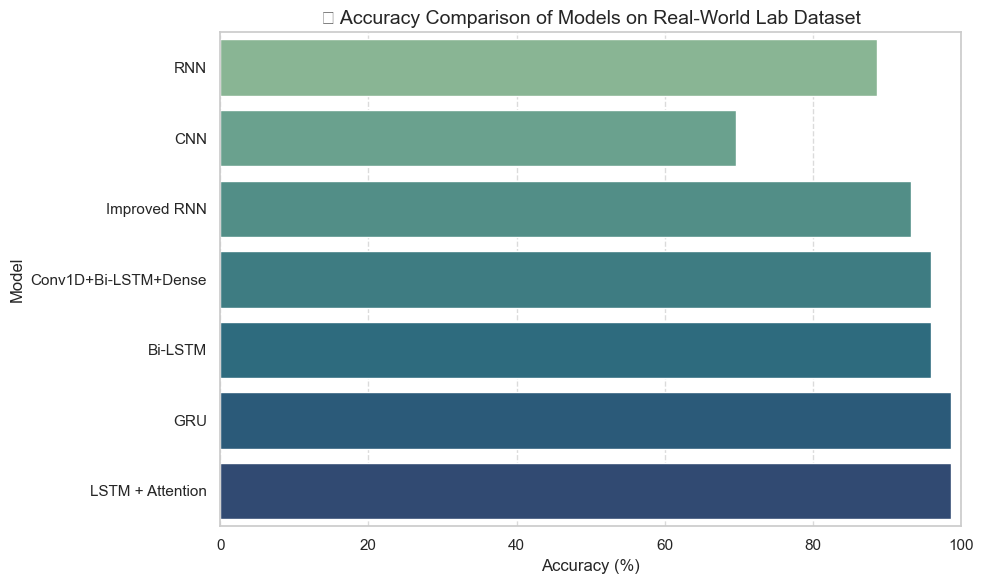

C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\3538672829.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\3538672829.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


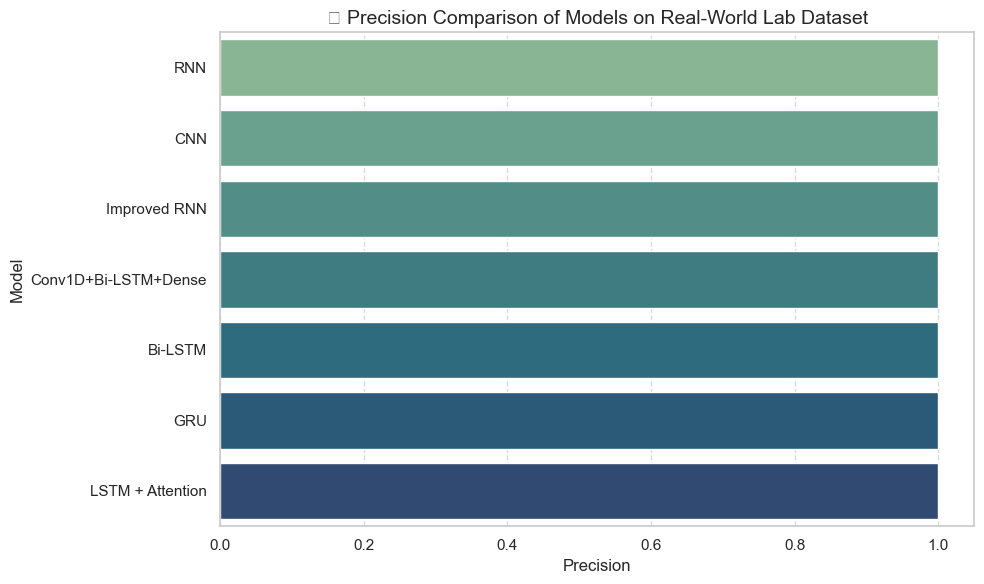

C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\3538672829.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\3538672829.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


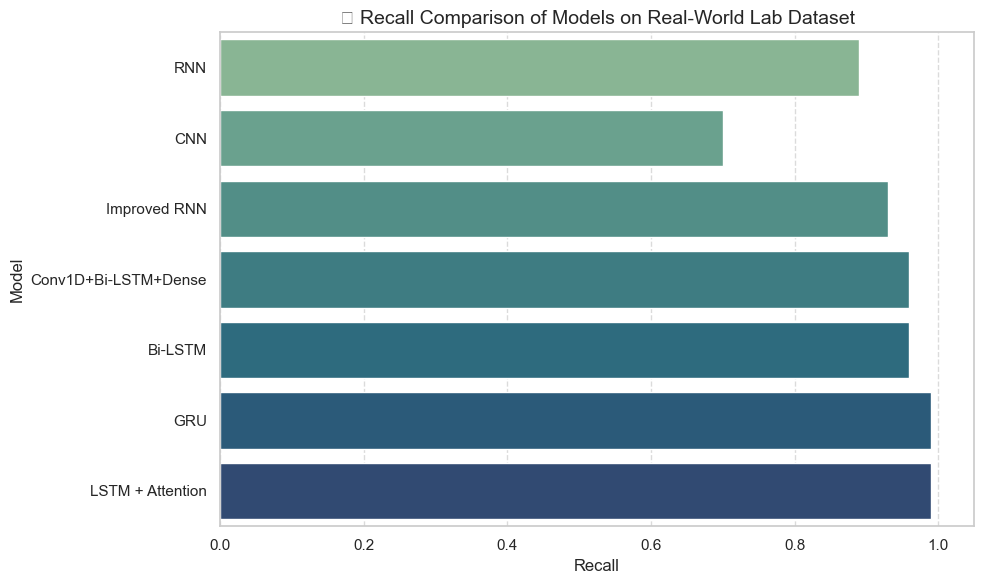

C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\3538672829.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_33156\3538672829.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


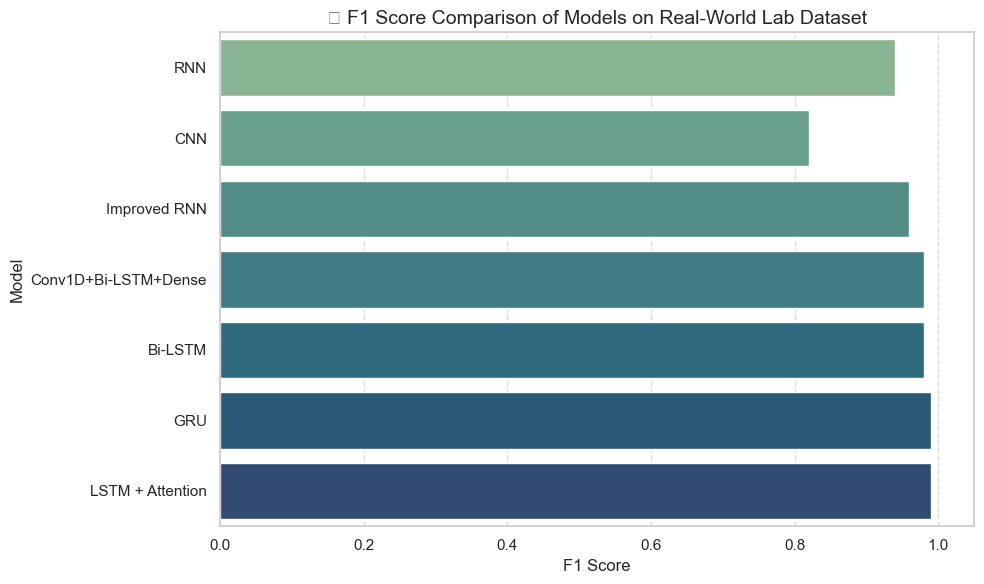

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure seaborn style
sns.set(style="whitegrid")

# Clean and convert classification metrics
for col in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    metrics_df[col] = metrics_df[col].astype(str).str.extract(r'([\d.]+)').astype(float)

# Plot settings per metric
metric_settings = {
    "Accuracy": {"xlim": (0, 100), "xlabel": "Accuracy (%)"},
    "Precision": {"xlim": (0, 1.05), "xlabel": "Precision"},
    "Recall": {"xlim": (0, 1.05), "xlabel": "Recall"},
    "F1 Score": {"xlim": (0, 1.05), "xlabel": "F1 Score"}
}

# List your 5 selected model names (must match the names in the DataFrame)
selected_models = ["CNN", "RNN", "Improved RNN", "Conv1D+Bi-LSTM+Dense","Bi-LSTM","GRU" ,"LSTM + Attention"]

# Filter DataFrame to include only these models
filtered_df = metrics_df[metrics_df["Model"].isin(selected_models)]

# Generate individual horizontal bar plots
for metric, settings in metric_settings.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=filtered_df, y="Model", x=metric, palette="crest")
    plt.title(f"📊 {metric} Comparison of Models on Real-World Lab Dataset", fontsize=14)
    plt.xlabel(settings["xlabel"])
    plt.ylabel("Model")
    plt.xlim(settings["xlim"])
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


## Collection of new point real world data points for testing the co-ordinates

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model

# ------------------ Define Custom Loss/Metric Functions ------------------
def euclidean_distance_loss(y_true, y_pred):
    return tf.reduce_mean(tf.sqrt(tf.reduce_sum(tf.square(y_true - y_pred), axis=-1)))

def rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# ------------------ Load Models ------------------
custom_objs = {'euclidean_distance_loss': euclidean_distance_loss, 'rmse': rmse}
rnn_model = load_model('simple_rnn.keras', custom_objects=custom_objs)
lstm_model = load_model('LSTM_model.keras', custom_objects=custom_objs)
bi_lstm_model = load_model('new_bi_lstm.h5', custom_objects=custom_objs)
gru_model = load_model('new_gru.h5', custom_objects=custom_objs)
new_lstm_attention = load_model('new_lstm_attention.h5', custom_objects=custom_objs)
conv_lstm = load_model('hybrid_model.keras', custom_objects=custom_objs)

# ------------------ Load New Dataset ------------------
# ⚠️ Replace with your actual file path
df = pd.read_csv(r'D:\THESIS WORK(indoorcoverage)\ThesisProject\data\MscLab_data\Tested_rssi_data.csv')  # Assuming a CSV file
print("Original Data Shape:", df.shape)



Original Data Shape: (7, 9)


In [14]:
# Split features and labels
X_new = df[['AP1', 'AP2', 'AP3', 'AP4','AP5','AP6']].values
y = df[['X', 'Y','Z']].values

In [15]:
X_new

array([[-62, -65, -73, -78, -60, -57],
       [-70, -65, -68, -69, -68, -45],
       [-58, -65, -69, -72, -66, -47],
       [-58, -65, -69, -73, -66, -46],
       [-65, -67, -65, -73, -63, -57],
       [-75, -68, -70, -75, -64, -54],
       [-75, -68, -72, -78, -65, -53]])

In [16]:
y

array([[6.096 , 0.6096, 4.572 ],
       [6.7056, 0.6096, 4.572 ],
       [7.3152, 0.6096, 4.572 ],
       [7.9248, 0.6096, 4.572 ],
       [8.5344, 0.6096, 4.572 ],
       [9.144 , 0.6096, 4.572 ],
       [9.7536, 0.6096, 4.572 ]])

In [17]:
X_new_reshaped = X_new.reshape((X_new.shape[0], 3, 2))  # Adjust shape to match training format


In [18]:
# ------------------ Predict ------------------
rnn_pred = rnn_model.predict(X_new_reshaped)
gru_pred = gru_model.predict(X_new_reshaped)
lstm_pred = lstm_model.predict(X_new_reshaped)
bi_lstm_pred = bi_lstm_model.predict(X_new_reshaped)
lstm_attention_pred = new_lstm_attention.predict(X_new_reshaped)
conv_pred = conv_lstm.predict(X_new_reshaped)

# ------------------ Combine & Save Predictions ------------------
pred_df = pd.DataFrame({
    'rnn_x': rnn_pred[:, 0],
    'rnn_y': rnn_pred[:, 1],
    'rnn_z': rnn_pred[:, 2],

    'gru_x': gru_pred[:, 0],
    'gru_y': gru_pred[:, 1],
    'gru_z': gru_pred[:, 2],

    'lstm_x': lstm_pred[:, 0],
    'lstm_y': lstm_pred[:, 1],
    'lstm_z': lstm_pred[:, 2],

    'bi_lstm_x': bi_lstm_pred[:, 0],
    'bi_lstm_y': bi_lstm_pred[:, 1],
    'bi_lstm_z': bi_lstm_pred[:, 2],

    'lstm_attention_x': lstm_attention_pred[:, 0],
    'lstm_attention_y': lstm_attention_pred[:, 1],
    'lstm_attention_z': lstm_attention_pred[:, 2],

    'stacked_lstm_x': lstm_attention_pred[:, 0],
    'stacked_lstm_y': lstm_attention_pred[:, 1],
    'stacked_lstm_z': lstm_attention_pred[:, 2],

    'conv_lstm_x': conv_pred[:, 0],
    'conv_lstm_y': conv_pred[:, 1],
    'conv_lstm_z': conv_pred[:, 2]
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


In [19]:
#  print first few predictions
print(pred_df.head(10))


      rnn_x     rnn_y     rnn_z     gru_x     gru_y     gru_z     lstm_x  \
0  1.876659  2.238860  4.847229  3.638646  2.737760  4.312446   8.204739   
1  5.344942  2.708800  4.773106  8.390775  1.500244  4.206096  11.536553   
2  3.496457  1.364742  4.721252  6.354565  1.103476  4.262510   9.716254   
3  3.342480  0.896580  4.715763  6.720710  1.112989  4.313612  10.094951   
4  4.218567  5.396903  4.721197  4.079567  3.953220  4.385736   8.730750   
5  5.175078  4.744869  4.951294  5.311106  3.145269  4.304733  11.362925   
6  4.532913  3.515144  5.028072  6.157146  2.687884  4.230991  11.438040   

     lstm_y    lstm_z  bi_lstm_x  ...  bi_lstm_z  lstm_attention_x  \
0  6.140359  5.693193   4.355298  ...   4.680037          4.431884   
1  1.297876  6.214785   9.440721  ...   4.501980          8.277408   
2  1.349526  5.942413   7.279019  ...   4.633595          8.420022   
3  1.210769  5.996711   7.635225  ...   4.631269          8.935327   
4  8.268031  5.736408   5.625393  ...   4

In [100]:
# Save to CSV
pred_df.to_csv("model_predictions.csv", index=False)
print("Predictions saved to 'model_predictions.csv'.")


Predictions saved to 'model_predictions.csv'.


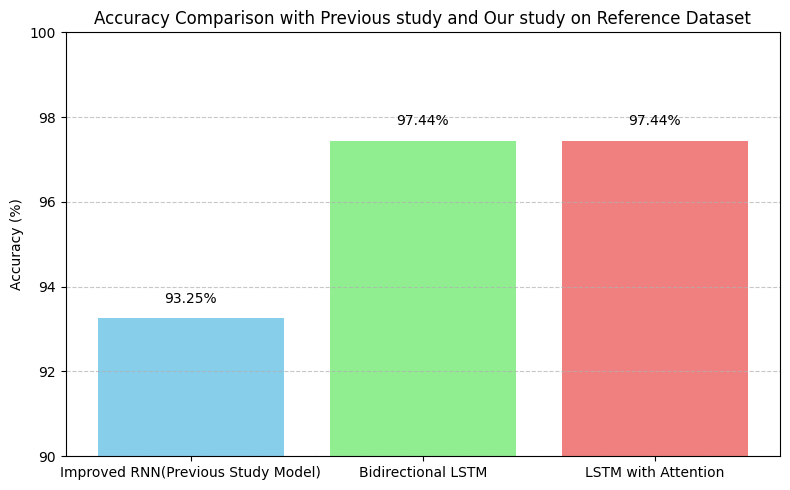

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding accuracy values
models = ['Improved RNN(Previous Study Model)', 'Bidirectional LSTM', 'LSTM with Attention']
accuracy = [93.25, 97.44, 97.44]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracy, color=['skyblue', 'lightgreen', 'lightcoral'])

# Annotate each bar with its accuracy value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval}%', ha='center', va='bottom', fontsize=10)

# Styling
plt.ylim(90, 100)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison with Previous study and Our study on Reference Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


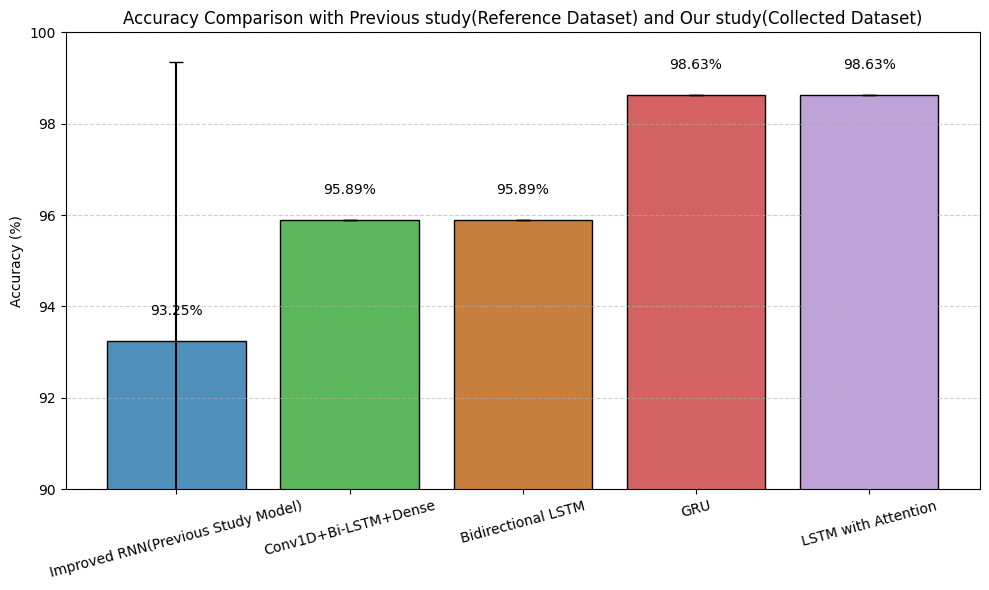

In [11]:
import matplotlib.pyplot as plt

# Model names
models = [
    'Improved RNN(Previous Study Model)',
    'Conv1D+Bi-LSTM+Dense',
    'Bidirectional LSTM',
    'GRU',
    'LSTM with Attention'
]

# Mean accuracy values
accuracy_means = [93.25, 95.89, 95.89, 98.63, 98.63]

# Standard deviations
accuracy_stds = [6.10, 0.00, 0.00, 0.00, 0.00]

# Assign unique colors for each bar
colors = ["#518fbb", "#5cb65c", "#c87e3c", "#d46262", "#bea2d8"]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_means, yerr=accuracy_stds, capsize=5,
               color=colors, edgecolor='black')

# Annotate each bar with accuracy value
for bar, acc in zip(bars, accuracy_means):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)

# Styling
plt.ylim(90, 100)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison with Previous study(Reference Dataset) and Our study(Collected Dataset)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
